This analysis focuses on the time series data from University Hospital Galway, examining inpatient cases across all medical specialties. Employing various regression techniques, the study models and predicts trends, including forecasting the number of patients expected to wait in the upcoming year. This comprehensive approach offers valuable insights into hospital admissions, aiding in enhanced patient care, resource management, and strategic operational planning.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import sklearn
import statsmodels

In [84]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [85]:
df = pd.read_csv('/Users/muffin/Desktop/Dataset.csv')
#Hospital- University Hospital Galway
#CaseType- Inpatient

In [86]:
df.head()

Years  Month    Date  Total Number of Patient Waiting
0   2014      1  2014-1                             1773
1   2014      2  2014-2                             1959
2   2014      3  2014-3                             1989
3   2014      4  2014-4                             2083
4   2014      5  2014-5                             2177

In [87]:
df.tail()

Years  Month     Date  Total Number of Patient Waiting
79   2020      8   2020-8                             2698
80   2020      9   2020-9                             2574
81   2020     10  2020-10                             2521
82   2020     11  2020-11                             2514
83   2020     12  2020-12                             2501

In [88]:
Time_Stamp = pd.date_range(start='2014-01-01',periods=len(df),freq='M')
Time_Stamp

DatetimeIndex(['2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
      

In [89]:
df['Time_Stamp'] = Time_Stamp
df.head()

Years  Month    Date  Total Number of Patient Waiting Time_Stamp
0   2014      1  2014-1                             1773 2014-01-31
1   2014      2  2014-2                             1959 2014-02-28
2   2014      3  2014-3                             1989 2014-03-31
3   2014      4  2014-4                             2083 2014-04-30
4   2014      5  2014-5                             2177 2014-05-31

In [90]:
df.set_index(keys='Time_Stamp',inplace=True)
df

Years  Month     Date  Total Number of Patient Waiting
Time_Stamp                                                        
2014-01-31   2014      1   2014-1                             1773
2014-02-28   2014      2   2014-2                             1959
2014-03-31   2014      3   2014-3                             1989
2014-04-30   2014      4   2014-4                             2083
2014-05-31   2014      5   2014-5                             2177
...           ...    ...      ...                              ...
2020-08-31   2020      8   2020-8                             2698
2020-09-30   2020      9   2020-9                             2574
2020-10-31   2020     10  2020-10                             2521
2020-11-30   2020     11  2020-11                             2514
2020-12-31   2020     12  2020-12                             2501

[84 rows x 4 columns]

In [91]:
df.drop(["Years", "Month"],axis=1,inplace=True)
df.drop("Date",axis=1,inplace=True)

In [92]:
df

Total Number of Patient Waiting
Time_Stamp                                 
2014-01-31                             1773
2014-02-28                             1959
2014-03-31                             1989
2014-04-30                             2083
2014-05-31                             2177
...                                     ...
2020-08-31                             2698
2020-09-30                             2574
2020-10-31                             2521
2020-11-30                             2514
2020-12-31                             2501

[84 rows x 1 columns]

In [93]:
df.describe()

Total Number of Patient Waiting
count                        84.000000
mean                       3126.392857
std                         517.186504
min                        1773.000000
25%                        2890.000000
50%                        3192.500000
75%                        3554.750000
max                        3829.000000

In [94]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

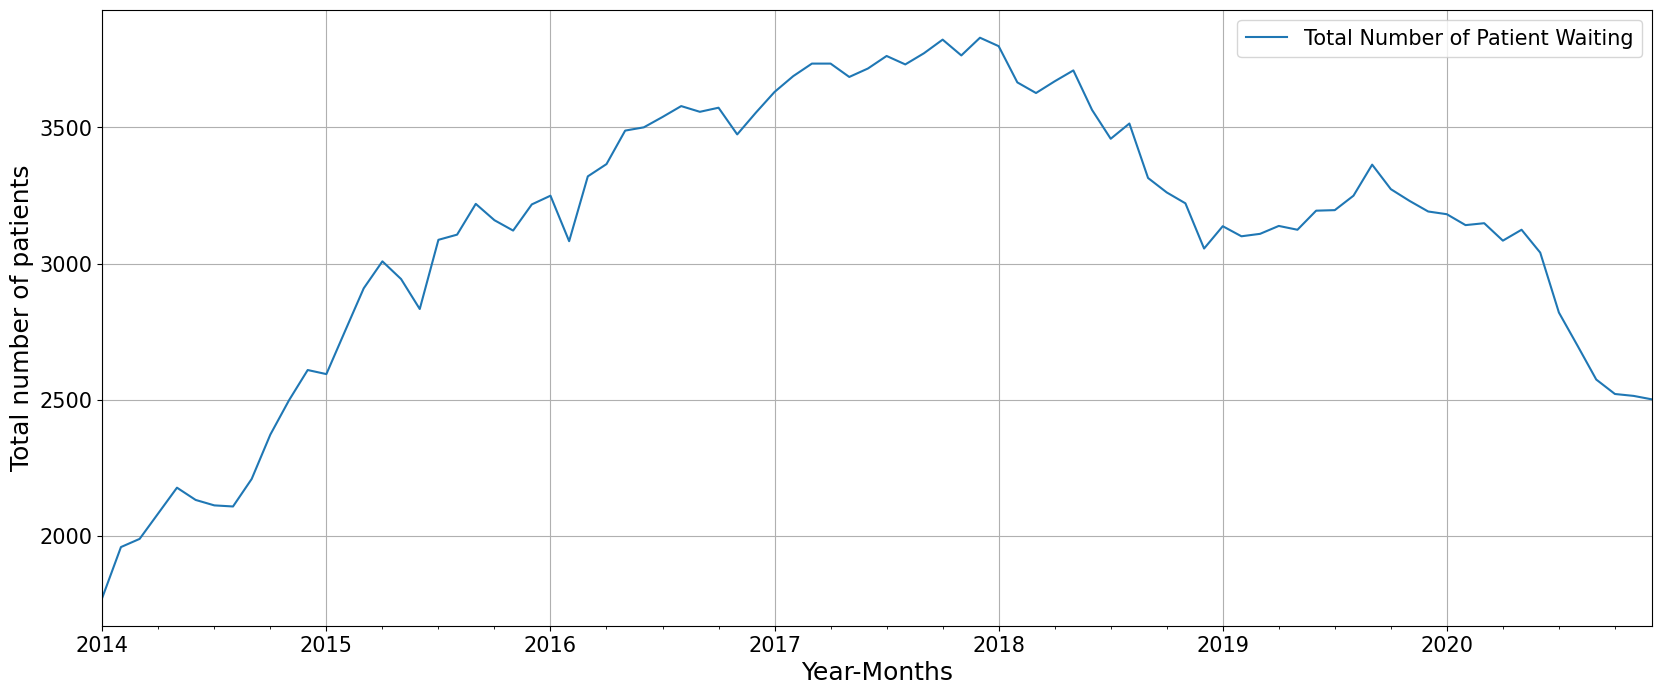

In [95]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

axis=df.plot(grid=True, fontsize=15);
plt.legend(loc='best',fontsize=15)
axis.set_xlabel('Year-Months', fontsize=18)
axis.set_ylabel('Total number of patients',fontsize=18)

plt.show()

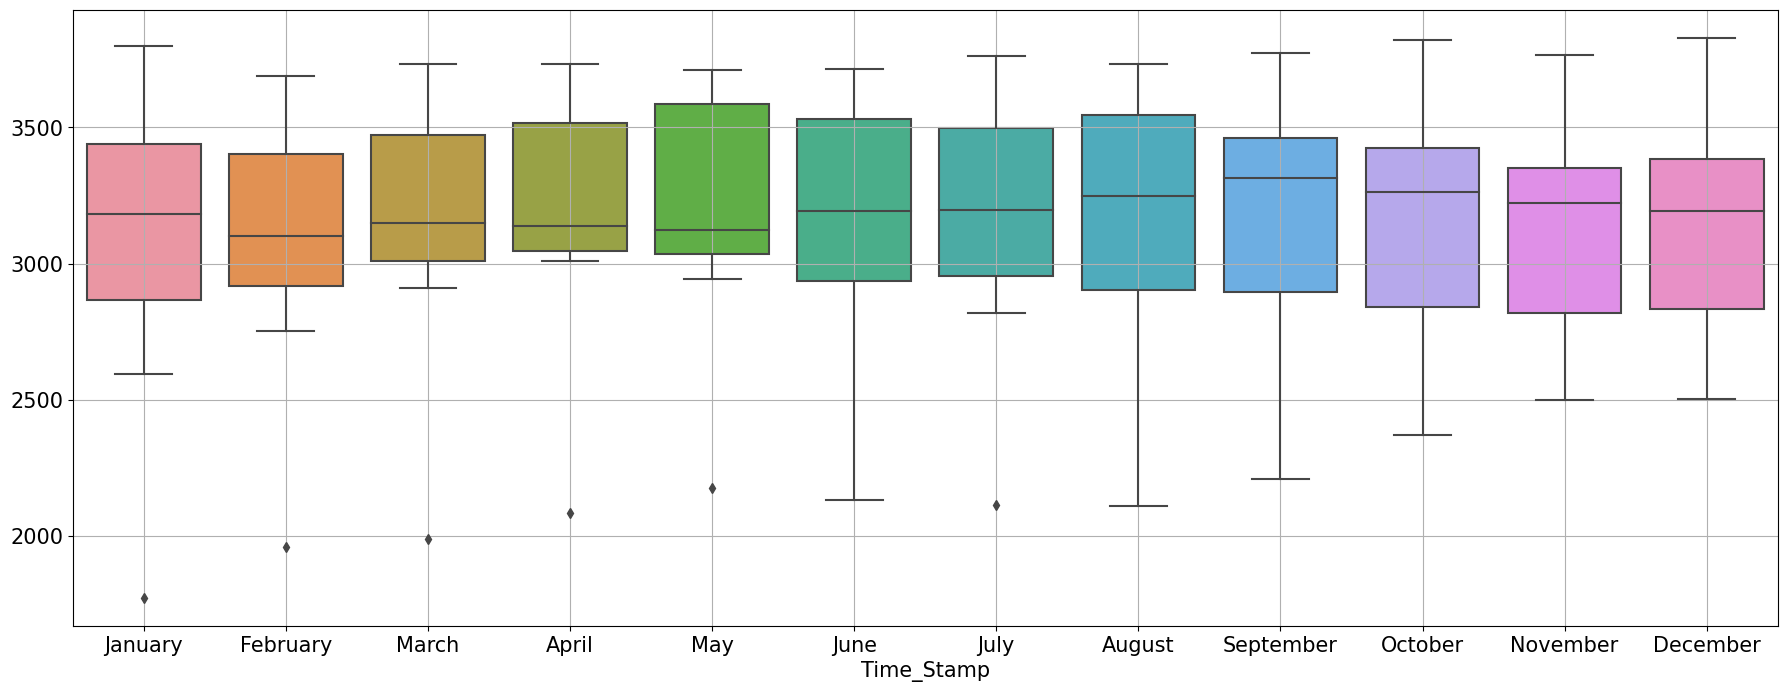

In [96]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)

plt.grid();

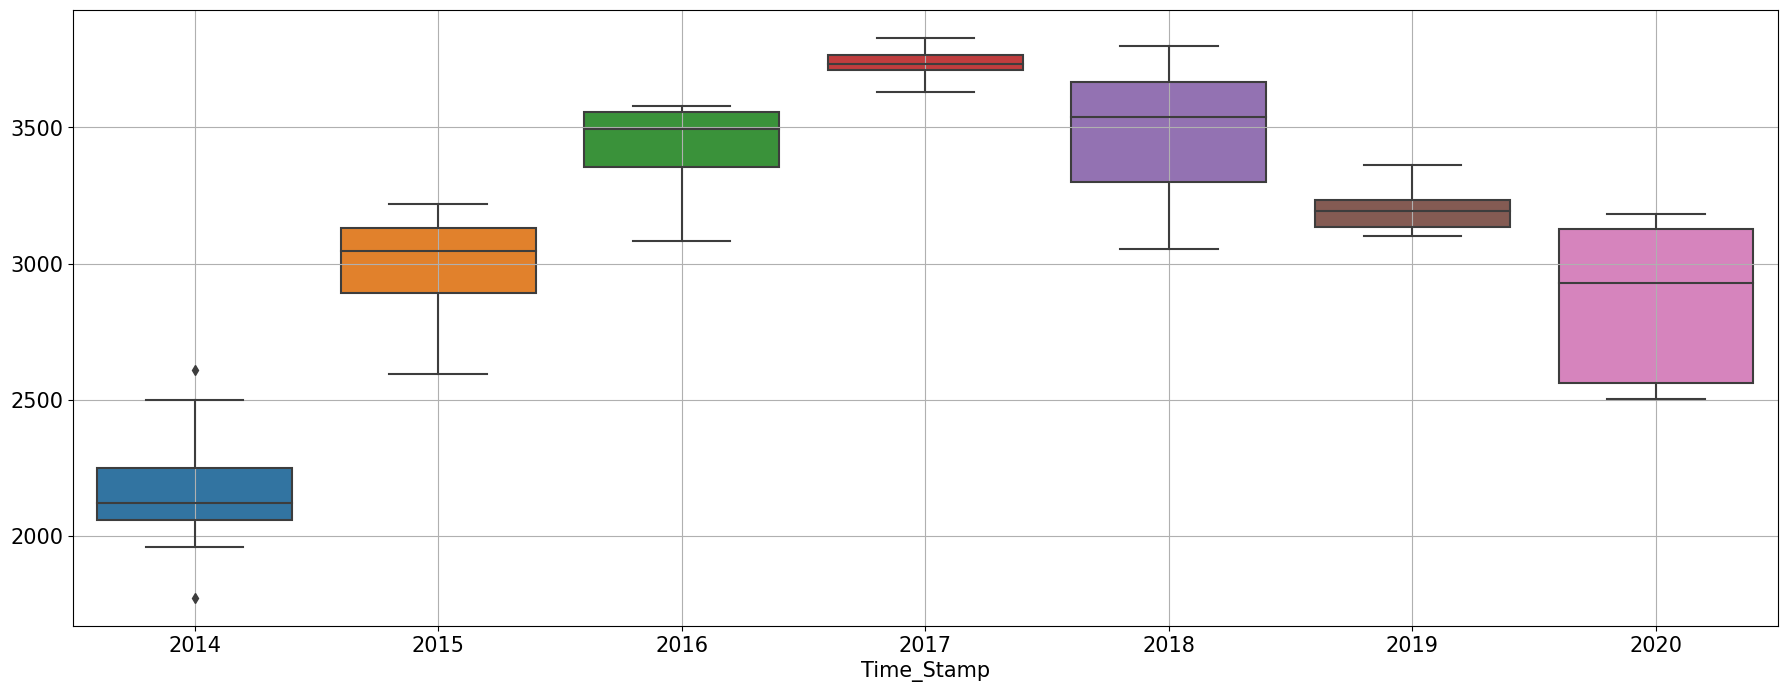

In [97]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)

plt.grid();

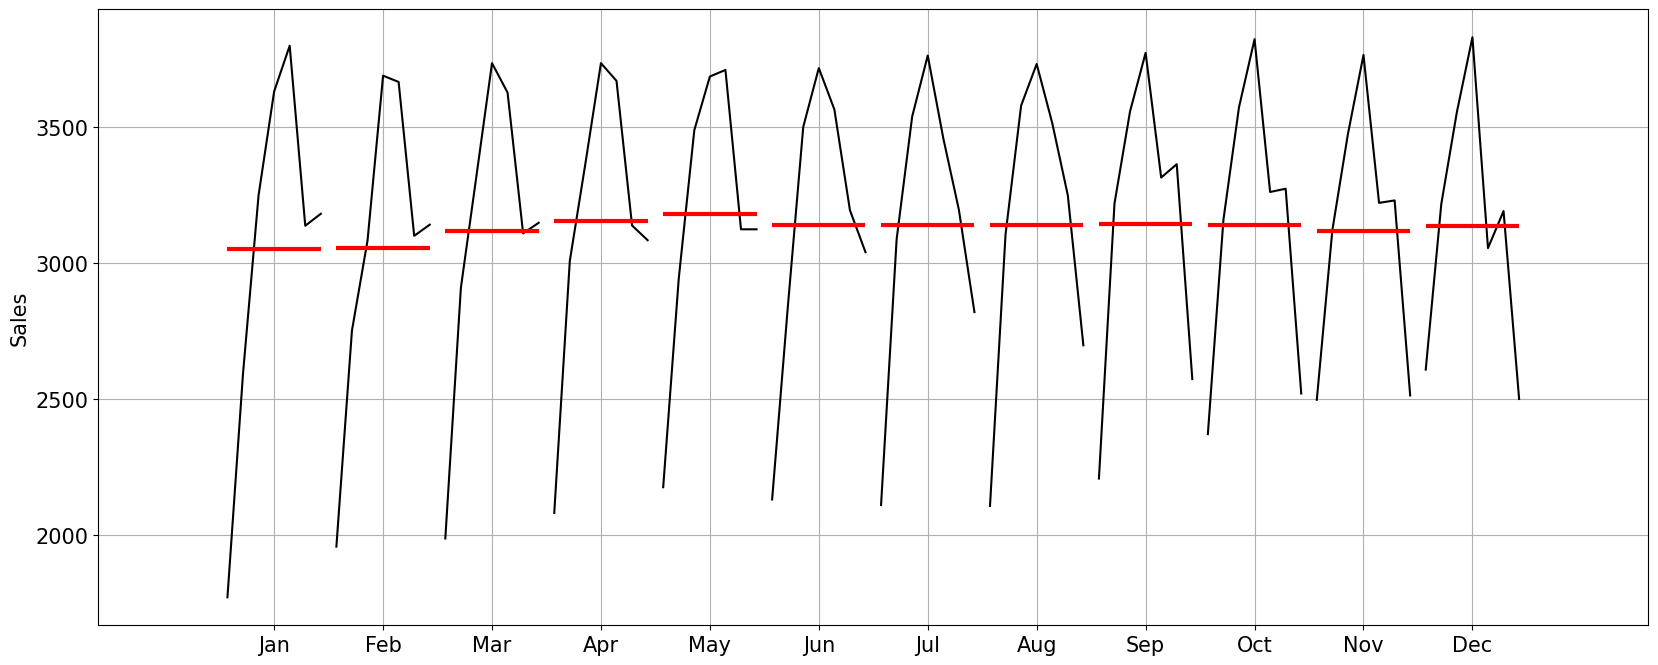

In [98]:
from statsmodels.graphics.tsaplots import month_plot

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

month_plot(df['Total Number of Patient Waiting'],ylabel='Sales')

plt.grid();

In [99]:
monthly_cases_across_years = pd.pivot_table(df, values = 'Total Number of Patient Waiting', columns = df.index.month_name(), index = df.index.year)


KeyError: 'Total Cases'

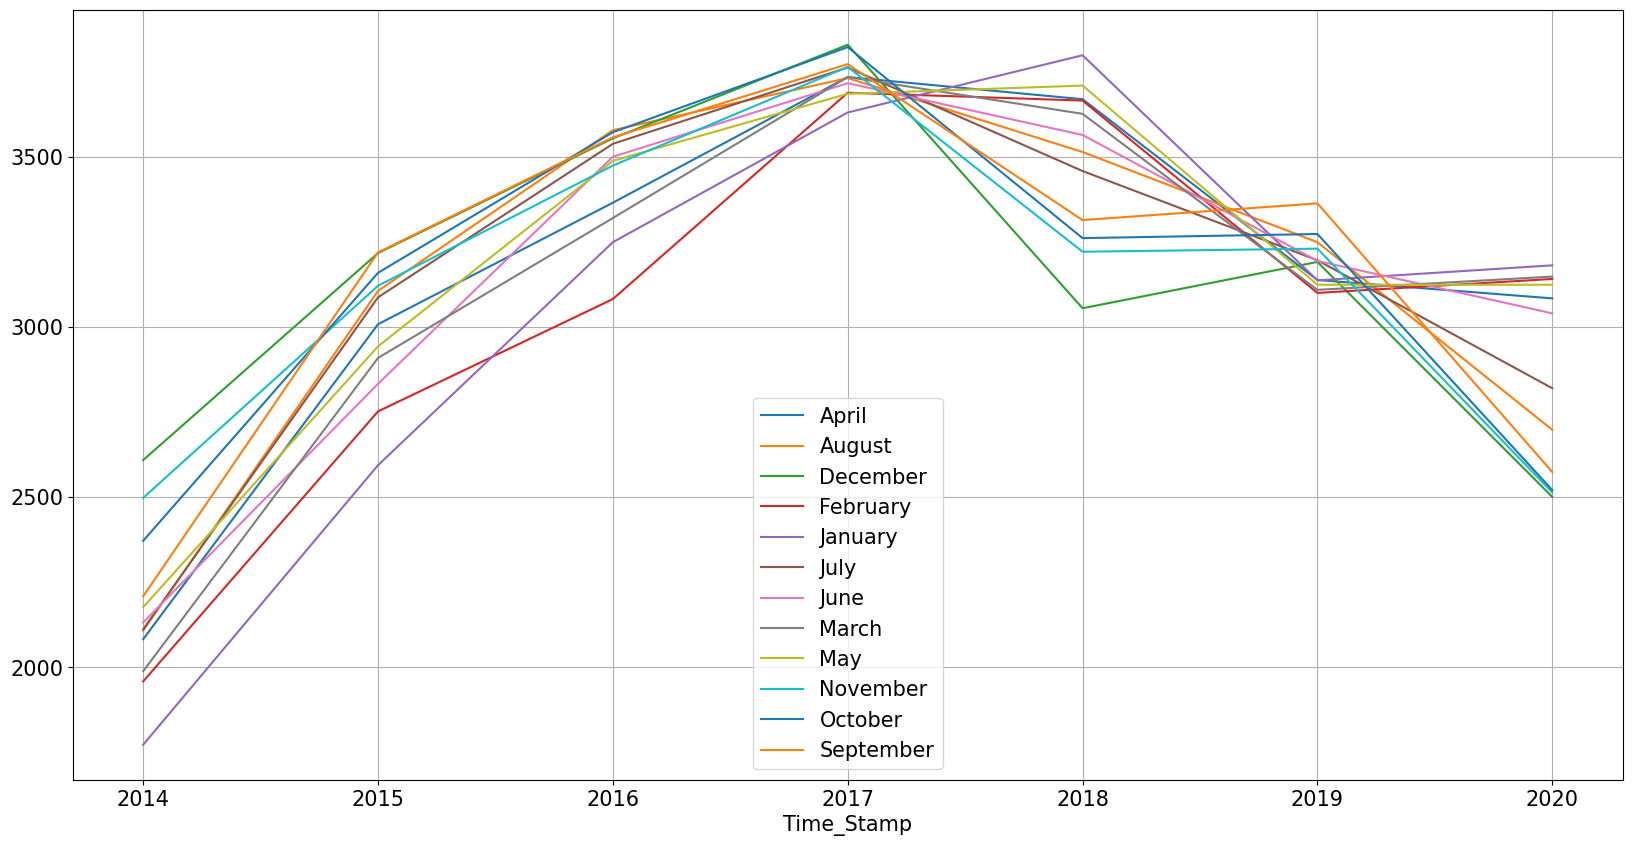

In [100]:
monthly_cases_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

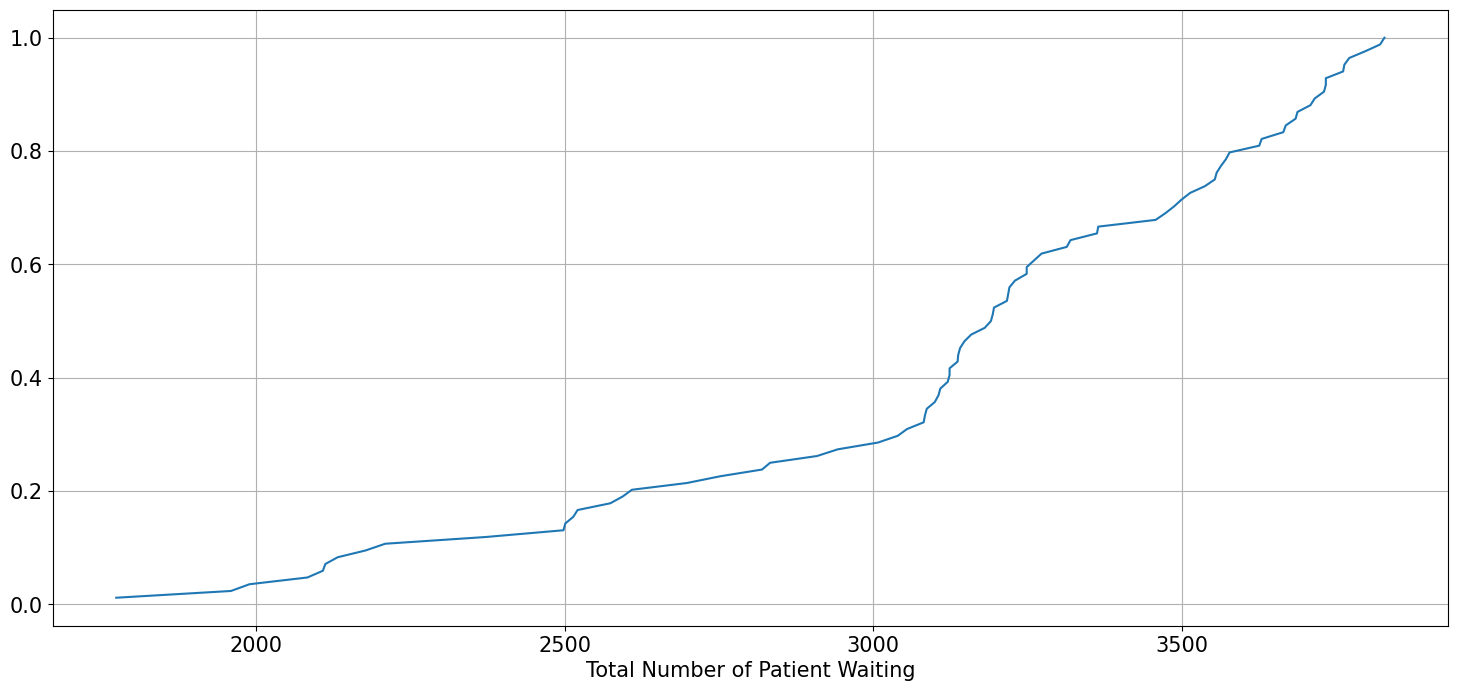

In [101]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Total Number of Patient Waiting'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Total Number of Patient Waiting');

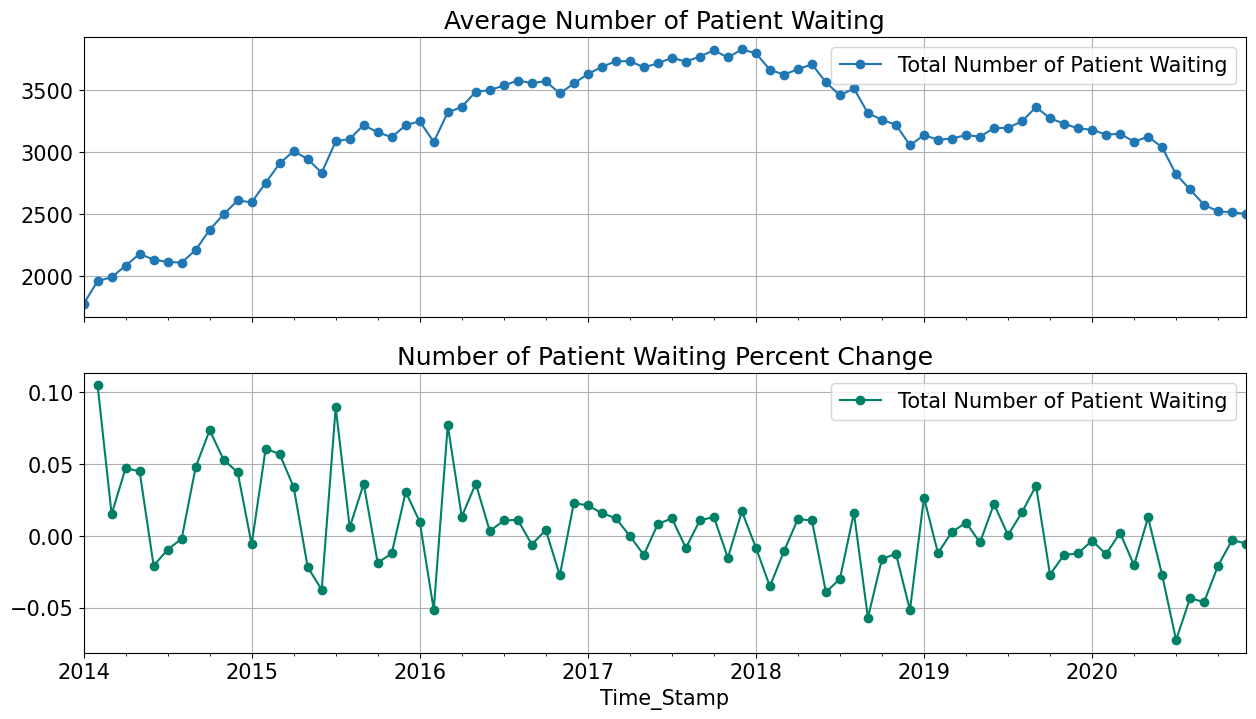

In [103]:
average    = df.groupby(df.index)["Total Number of Patient Waiting"].mean()
pct_change = df.groupby(df.index)["Total Number of Patient Waiting"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Number of Patient Waiting",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Number of Patient Waiting Percent Change",grid=True)

In [104]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

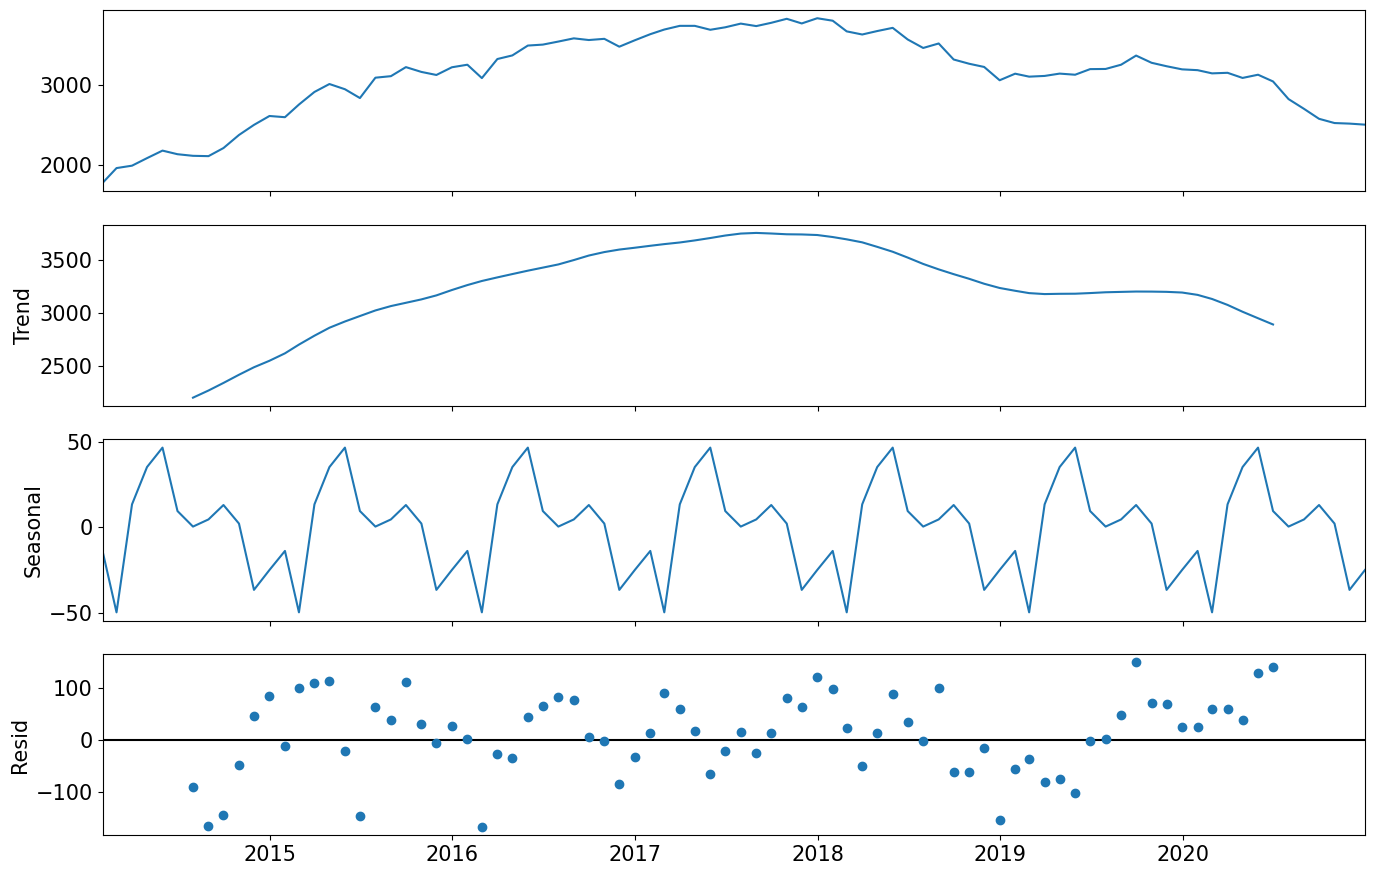

In [105]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 9

decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

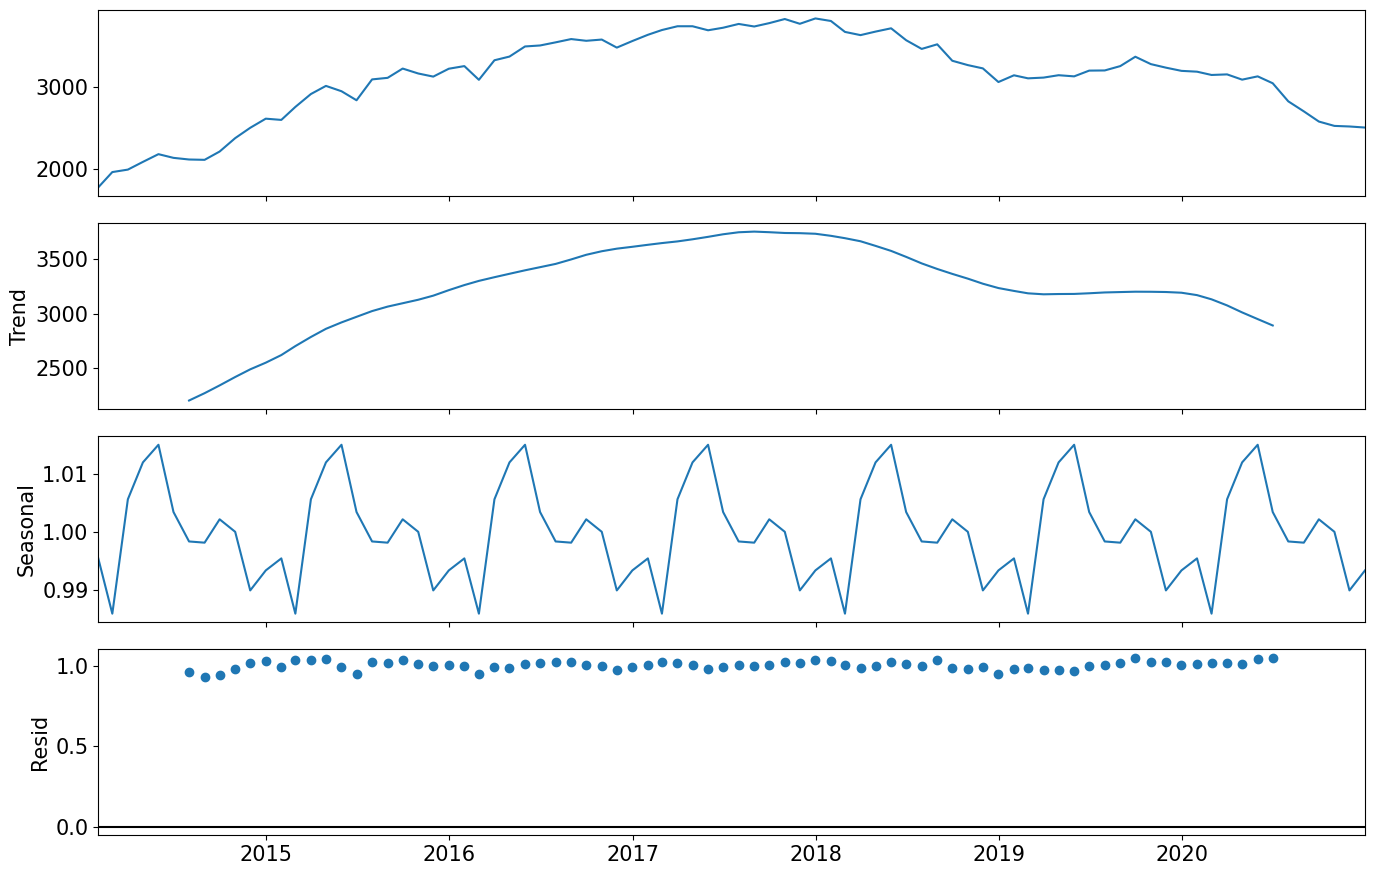

In [106]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 9

decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [112]:
train = df[df.index<'2019-01-31'] 
test = df[df.index>='2019-01-31']

In [113]:
train.size

60

In [114]:
train.head()

Total Number of Patient Waiting
Time_Stamp                                 
2014-01-31                             1773
2014-02-28                             1959
2014-03-31                             1989
2014-04-30                             2083
2014-05-31                             2177

In [115]:
test.size

24

In [116]:
test.head()

Total Number of Patient Waiting
Time_Stamp                                 
2019-01-31                             3137
2019-02-28                             3100
2019-03-31                             3109
2019-04-30                             3138
2019-05-31                             3124

In [117]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [118]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]

In [119]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
lr = LinearRegression()

In [122]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Total Number of Patient Waiting'].values)

LinearRegression()

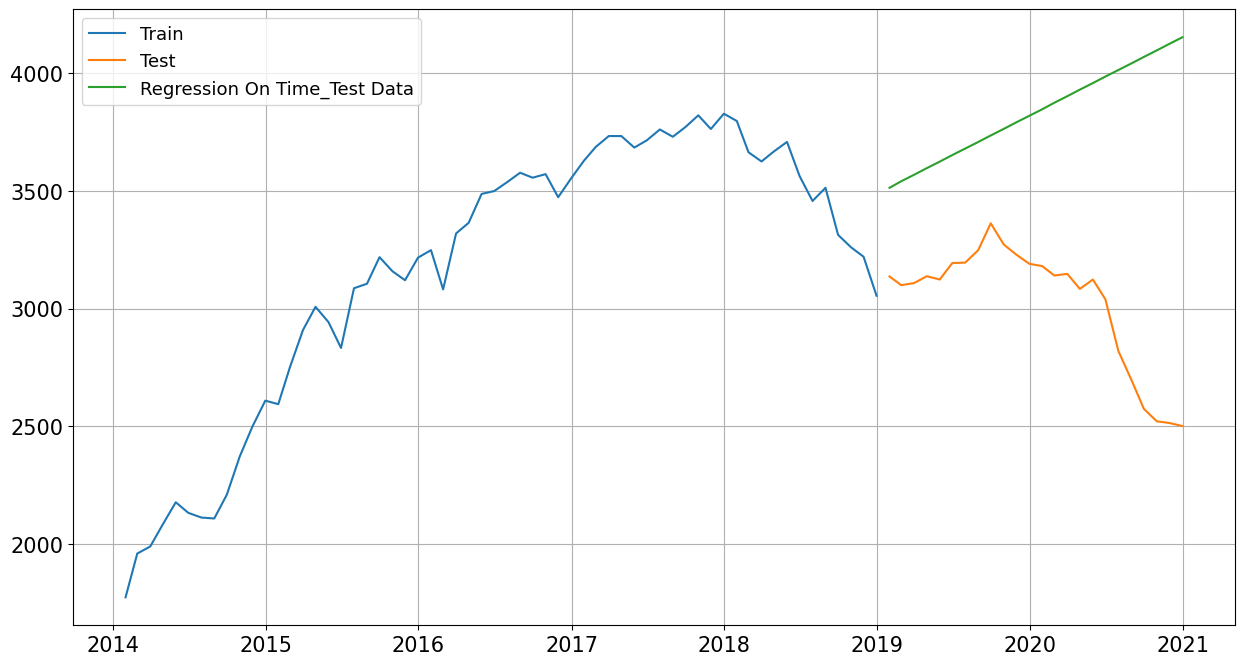

In [123]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(15,8))
plt.plot( train['Total Number of Patient Waiting'], label='Train')
plt.plot(test['Total Number of Patient Waiting'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best',fontsize=13)
plt.grid();

In [124]:
from sklearn import metrics

In [125]:
## Test Data - RMSE

rmse_lr_test= metrics.mean_squared_error(test['Total Number of Patient Waiting'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_lr_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 911.130


In [126]:
resultsDf = pd.DataFrame({'Model': 'Linear Regression' ,'Test RMSE': [rmse_lr_test]})
resultsDf

Model   Test RMSE
0  Linear Regression  911.129916

Naive Approach

In [127]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [128]:
NaiveModel_test['naive'] = np.asarray(train['Total Number of Patient Waiting'])[len(np.asarray(train['Total Number of Patient Waiting']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
2019-01-31    3055
2019-02-28    3055
2019-03-31    3055
2019-04-30    3055
2019-05-31    3055
Name: naive, dtype: int64

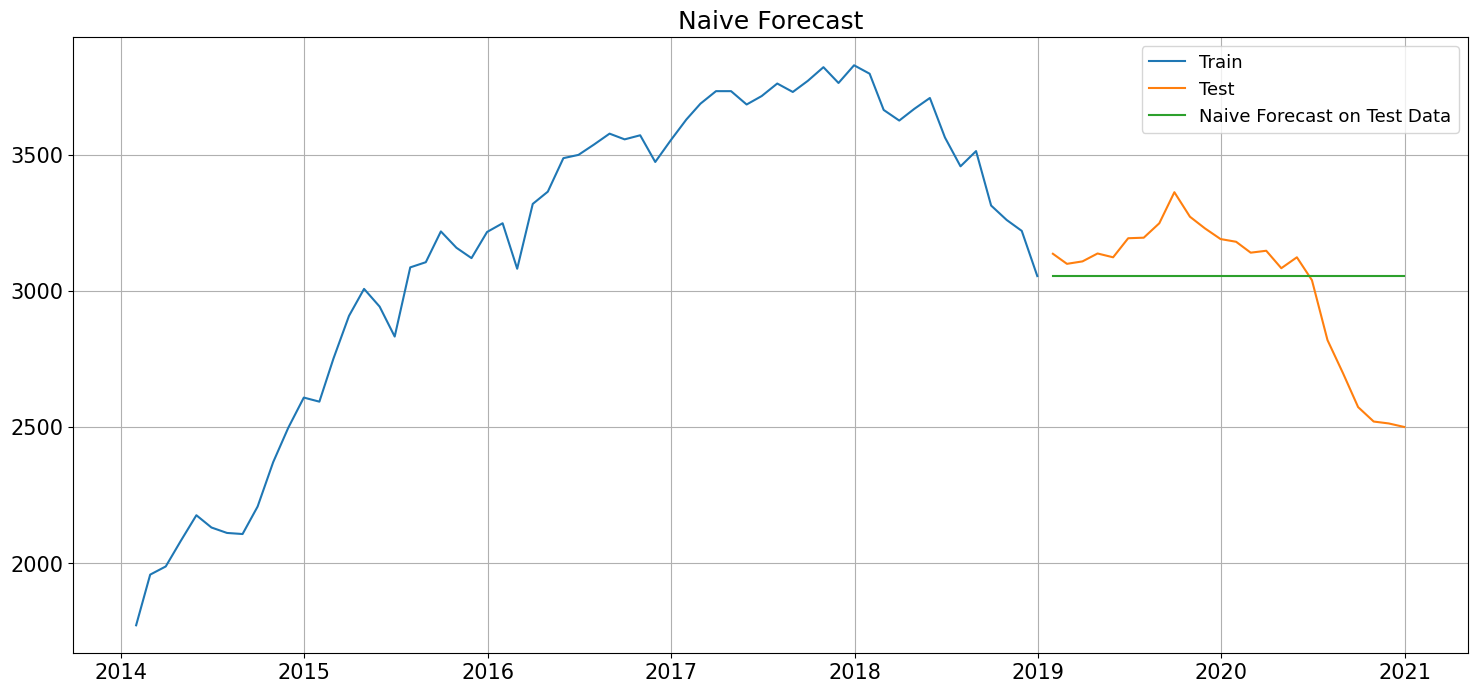

In [130]:
plt.figure(figsize=(18,8))
plt.plot(NaiveModel_train['Total Number of Patient Waiting'], label='Train')
plt.plot(test['Total Number of Patient Waiting'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best',fontsize=13)
plt.title("Naive Forecast")
plt.grid();

In [131]:
rmse_naive = metrics.mean_squared_error(test['Total Number of Patient Waiting'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_naive))

For RegressionOnTime forecast on the Test Data,  RMSE is 260.464


In [132]:
resultsDf_2 = pd.DataFrame({'Model': 'Naive Model' ,'Test RMSE': [rmse_naive]})
resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Model   Test RMSE
0  Linear Regression  911.129916
0        Naive Model  260.464169

Method 3: Simple Average

In [133]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [134]:
SimpleAverage_test['mean_forecast'] = train['Total Number of Patient Waiting'].mean()
SimpleAverage_test.head()

Total Number of Patient Waiting  mean_forecast
Time_Stamp                                                
2019-01-31                             3137    3166.116667
2019-02-28                             3100    3166.116667
2019-03-31                             3109    3166.116667
2019-04-30                             3138    3166.116667
2019-05-31                             3124    3166.116667

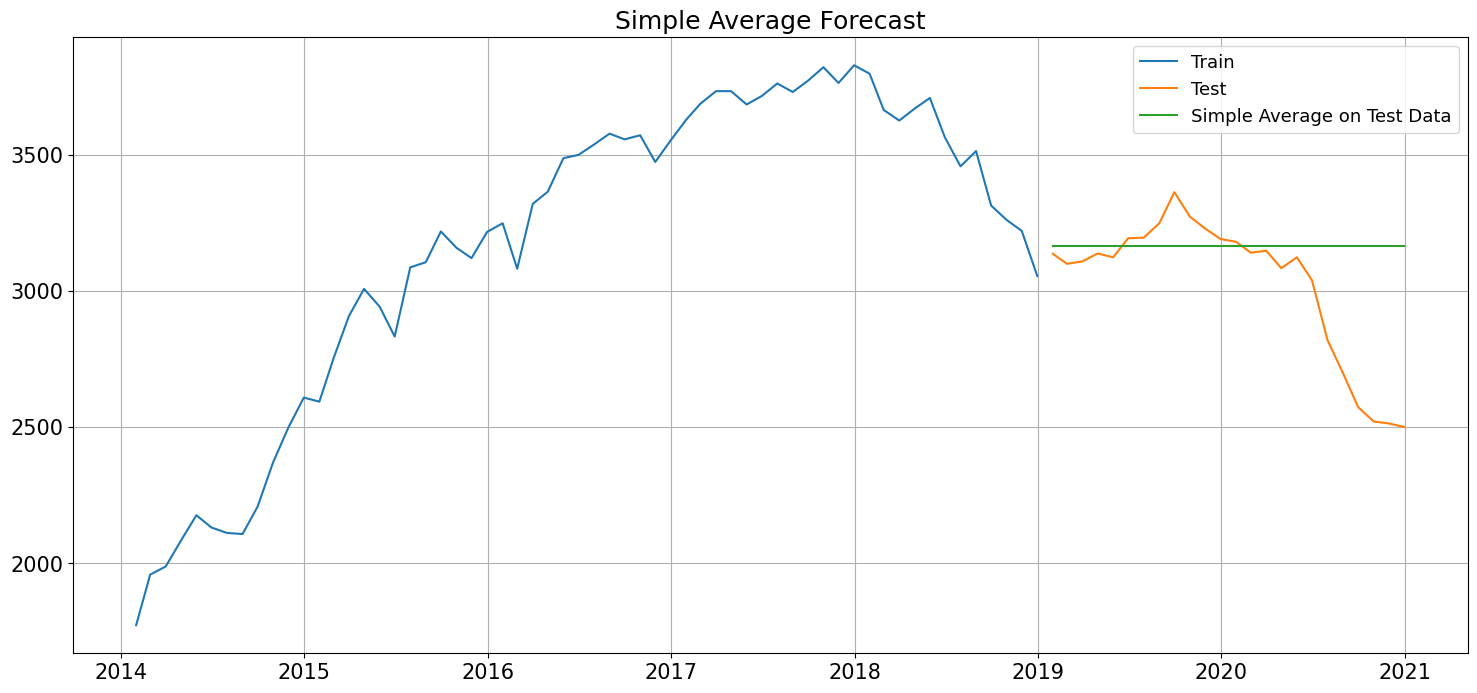

In [135]:
plt.figure(figsize=(18,8))
plt.plot(SimpleAverage_train['Total Number of Patient Waiting'], label='Train')
plt.plot(SimpleAverage_test['Total Number of Patient Waiting'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best',fontsize=13)
plt.title("Simple Average Forecast")
plt.grid();

In [136]:
rmse_simpleavg = metrics.mean_squared_error(test['Total Number of Patient Waiting'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_simpleavg))

For Simple Average forecast on the Test Data,  RMSE is 293.926


In [137]:
resultsDf_3 = pd.DataFrame({'Model': 'Simple Average Forecast' ,'Test RMSE': [rmse_simpleavg]})

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Model   Test RMSE
0        Linear Regression  911.129916
0              Naive Model  260.464169
0  Simple Average Forecast  293.926030

Method 4: Moving Average(MA)

In [138]:
MovingAverage = df.copy()
MovingAverage.head()

Total Number of Patient Waiting
Time_Stamp                                 
2014-01-31                             1773
2014-02-28                             1959
2014-03-31                             1989
2014-04-30                             2083
2014-05-31                             2177

In [139]:
MovingAverage['Trailing_2'] = MovingAverage['Total Number of Patient Waiting'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Total Number of Patient Waiting'].rolling(4).mean()
MovingAverage['Trailing_7'] = MovingAverage['Total Number of Patient Waiting'].rolling(7).mean()
MovingAverage['Trailing_10'] = MovingAverage['Total Number of Patient Waiting'].rolling(10).mean()

MovingAverage.head()

Total Number of Patient Waiting  Trailing_2  Trailing_4  \
Time_Stamp                                                            
2014-01-31                             1773         NaN         NaN   
2014-02-28                             1959      1866.0         NaN   
2014-03-31                             1989      1974.0         NaN   
2014-04-30                             2083      2036.0      1951.0   
2014-05-31                             2177      2130.0      2052.0   

            Trailing_7  Trailing_10  
Time_Stamp                           
2014-01-31         NaN          NaN  
2014-02-28         NaN          NaN  
2014-03-31         NaN          NaN  
2014-04-30         NaN          NaN  
2014-05-31         NaN          NaN

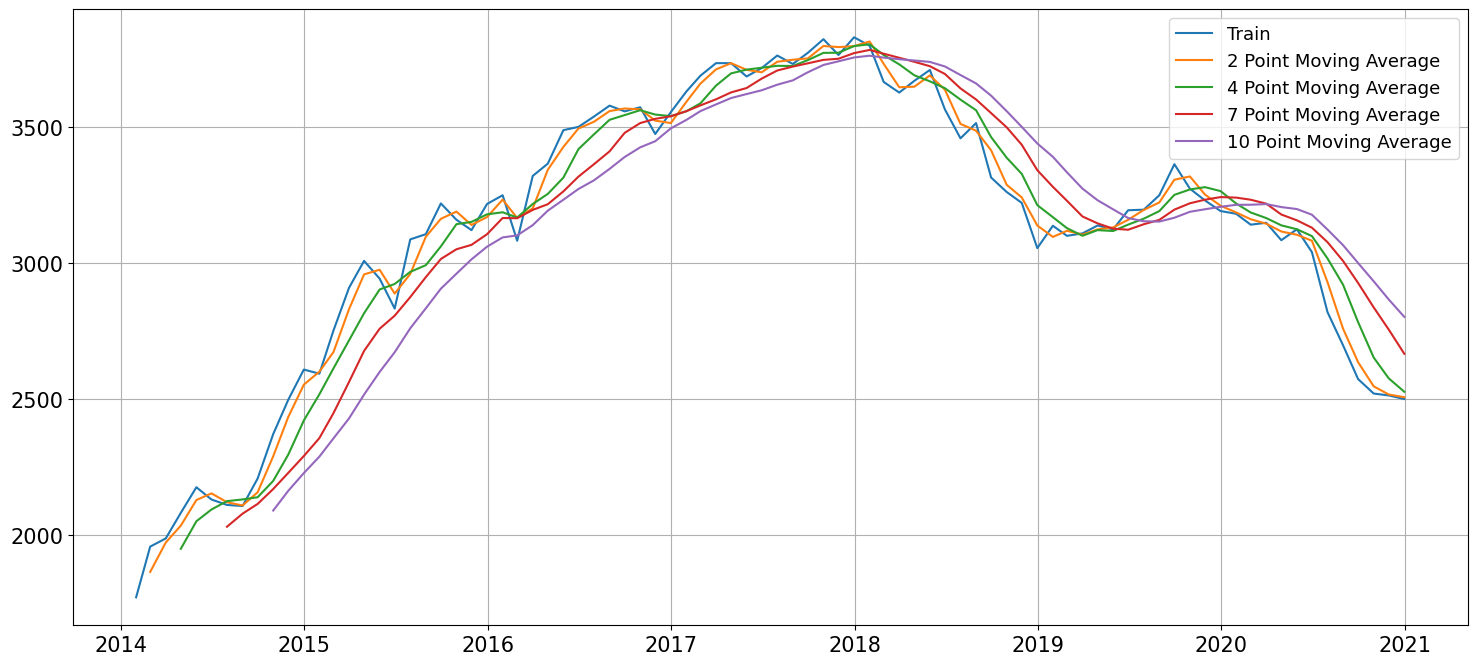

In [140]:
plt.figure(figsize=(18,8))
plt.plot(MovingAverage['Total Number of Patient Waiting'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_7'],label = '7 Point Moving Average')
plt.plot(MovingAverage['Trailing_10'],label = '10 Point Moving Average')

plt.legend(loc='best',fontsize=13)
plt.grid();

In [141]:
trailing_MovingAverage_train=MovingAverage[0:len(train)] 
trailing_MovingAverage_test=MovingAverage[len(train):]

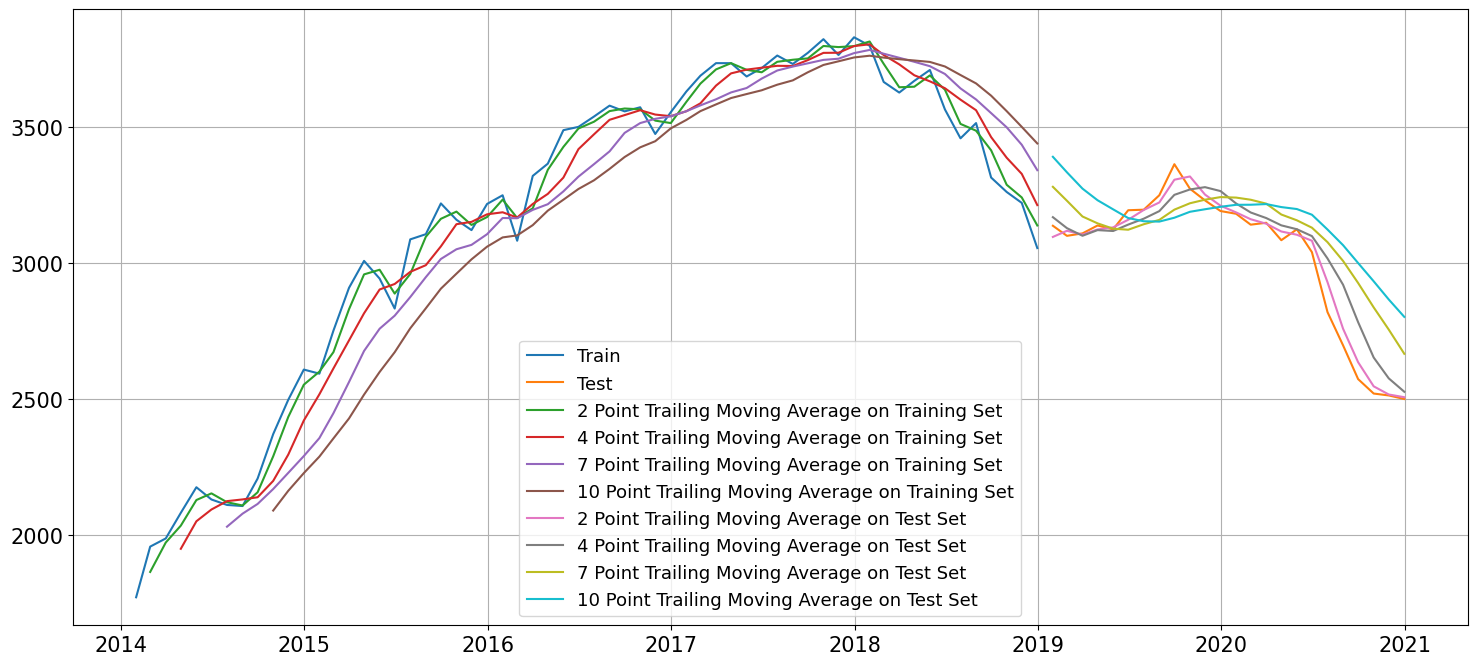

In [143]:
plt.figure(figsize=(18,8))
plt.plot(trailing_MovingAverage_train['Total Number of Patient Waiting'], label='Train')
plt.plot(trailing_MovingAverage_test['Total Number of Patient Waiting'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_7'],label = '7 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_10'],label = '10 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_7'],label = '7 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_10'],label = '10 Point Trailing Moving Average on Test Set')
plt.legend(loc='best',fontsize=13)
plt.grid();

In [144]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Total Number of Patient Waiting'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Total Number of Patient Waiting'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_7 = metrics.mean_squared_error(test['Total Number of Patient Waiting'],trailing_MovingAverage_test['Trailing_7'],squared=False)
print("For 7 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_7))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_10 = metrics.mean_squared_error(test['Total Number of Patient Waiting'],trailing_MovingAverage_test['Trailing_10'],squared=False)
print("For 10 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_10))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 37.856
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 89.946
For 7 point Moving Average Model forecast on the Training Data,  RMSE is 157.834
For 10 point Moving Average Model forecast on the Training Data,  RMSE is 210.405 


In [145]:
resultsDf_4 = pd.DataFrame({'Model':['2 pointTrailingMovingAverage','4 pointTrailingMovingAverage'
                                   ,'7 pointTrailingMovingAverage','10 pointTrailingMovingAverage'] ,
                            'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_7,rmse_model4_test_10]})

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Model   Test RMSE
0              Linear Regression  911.129916
0                    Naive Model  260.464169
0        Simple Average Forecast  293.926030
0   2 pointTrailingMovingAverage   37.856362
1   4 pointTrailingMovingAverage   89.946309
2   7 pointTrailingMovingAverage  157.833981
3  10 pointTrailingMovingAverage  210.405053

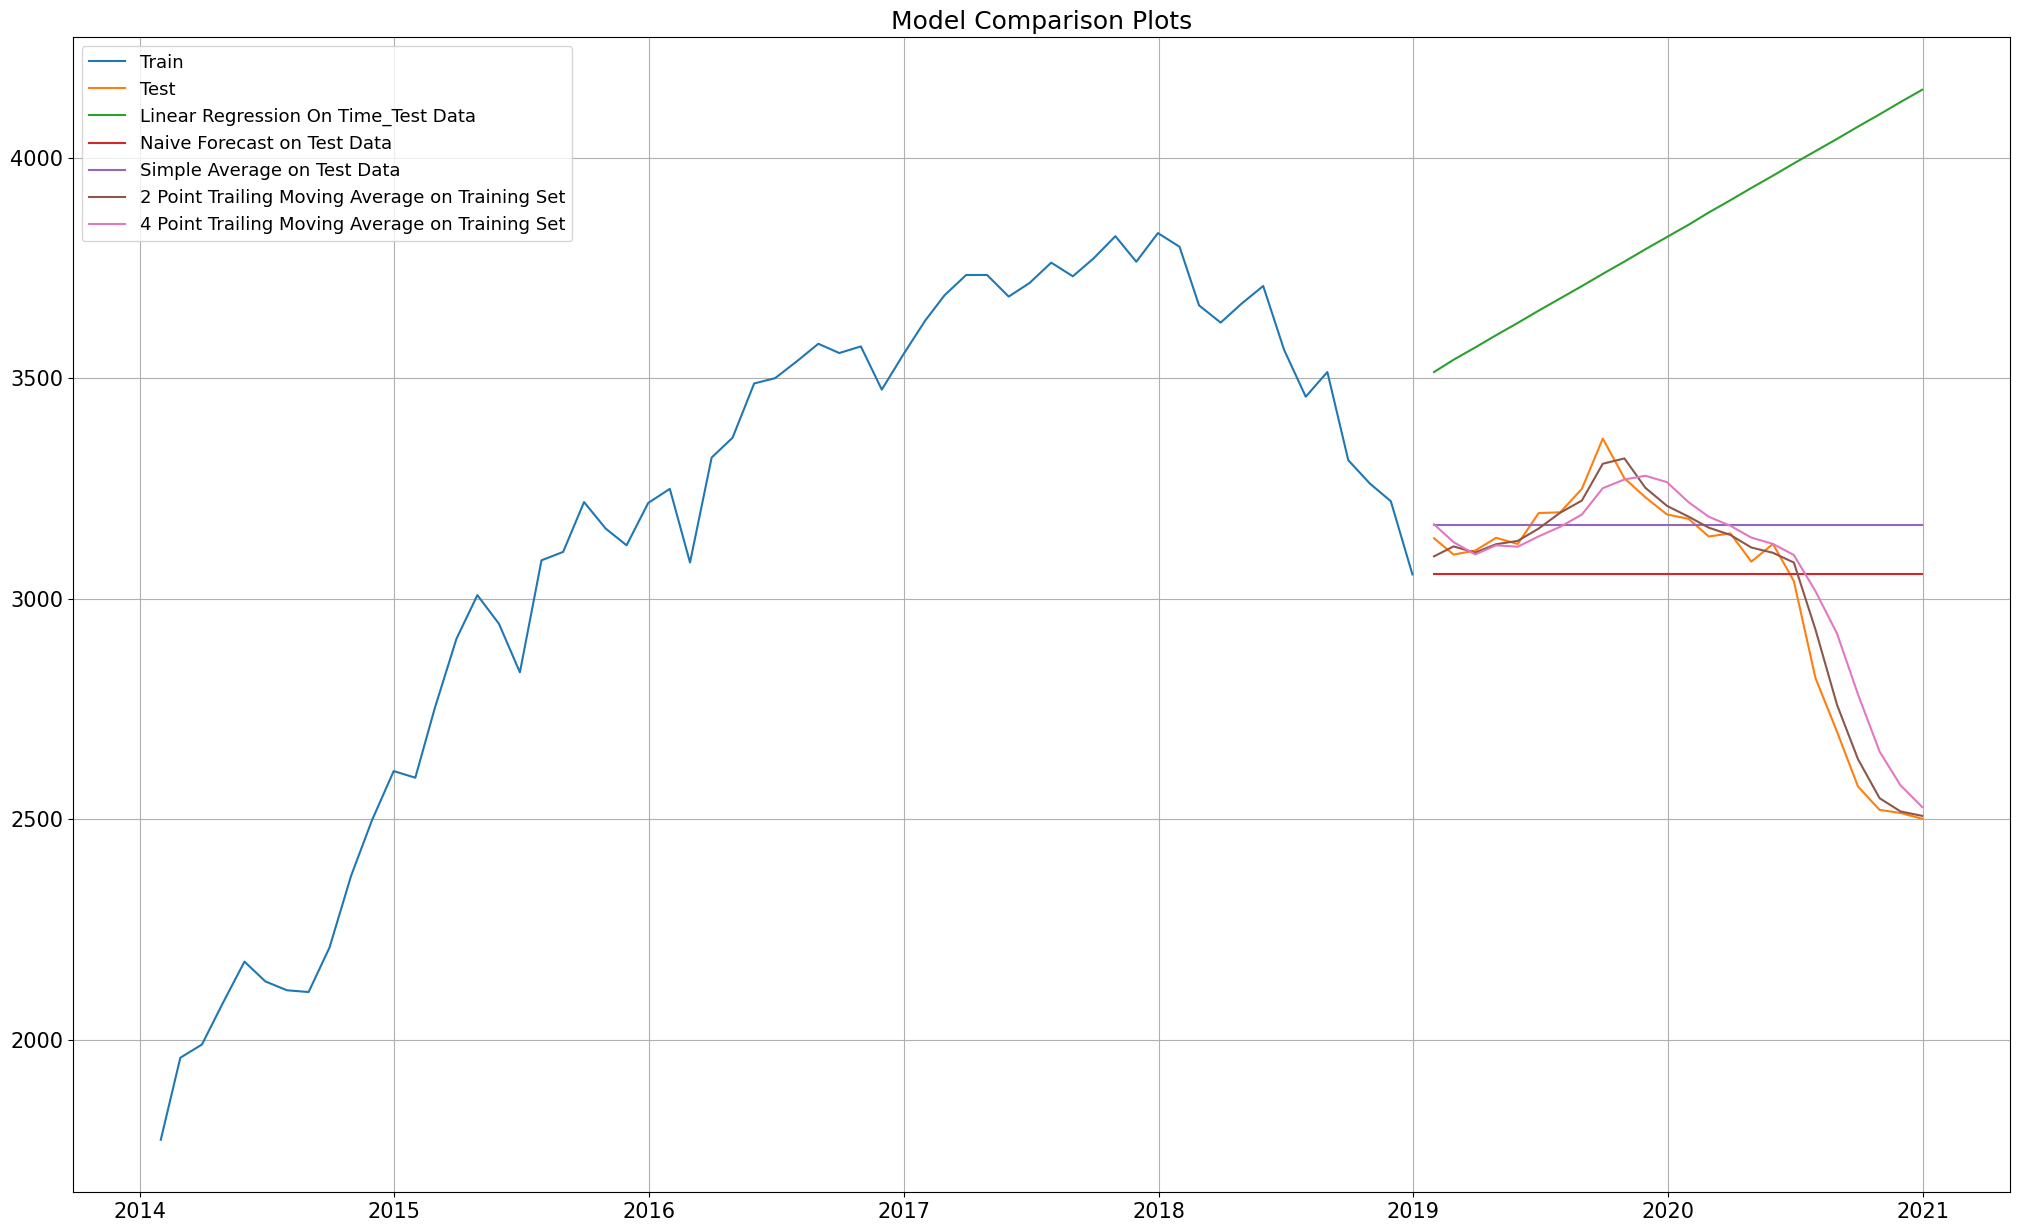

In [236]:
plt.figure(figsize=(25 ,15))
plt.plot(train['Total Number of Patient Waiting'], label='Train')
plt.plot(test['Total Number of Patient Waiting'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')

plt.legend(loc='best',fontsize=13)
plt.title("Model Comparison Plots")
plt.grid();

In [147]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [148]:
SES_train = train.copy()
SES_test = test.copy()

In [149]:
model_SES = SimpleExpSmoothing(SES_train['Total Number of Patient Waiting'],initialization_method='estimated')

/Users/muffin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [150]:
model_SES_autofit = model_SES.fit(optimized=True)

In [151]:
model_SES_autofit.params

{'smoothing_level': 0.9864763555259936,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1819.3787802085162,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [152]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test)+1)
SES_test.head()

Total Number of Patient Waiting      predict
Time_Stamp                                              
2019-01-31                             3137  3057.252378
2019-02-28                             3100  3057.252378
2019-03-31                             3109  3057.252378
2019-04-30                             3138  3057.252378
2019-05-31                             3124  3057.252378

In [153]:
SES_test.isnull().sum()

Total Number of Patient Waiting    0
predict                            0
dtype: int64

In [154]:
SES_test

Total Number of Patient Waiting      predict
Time_Stamp                                              
2019-01-31                             3137  3057.252378
2019-02-28                             3100  3057.252378
2019-03-31                             3109  3057.252378
2019-04-30                             3138  3057.252378
2019-05-31                             3124  3057.252378
2019-06-30                             3194  3057.252378
2019-07-31                             3196  3057.252378
2019-08-31                             3249  3057.252378
2019-09-30                             3363  3057.252378
2019-10-31                             3273  3057.252378
2019-11-30                             3230  3057.252378
2019-12-31                             3191  3057.252378
2020-01-31                             3181  3057.252378
2020-02-29                             3141  3057.252378
2020-03-31                             3148  3057.252378
2020-04-30                             3084  3057.252378
2020-05-31                             3124  3057.252378
2020-06-30                             3040  3057.252378
2020-07-31                             2820  3057.252378
2020-08-31                             2698  3057.252378
2020-09-30                             2574  3057.252378
2020-10-31                             2521  3057.252378
2020-11-30                             2514  3057.252378
2020-12-31                             2501  3057.252378

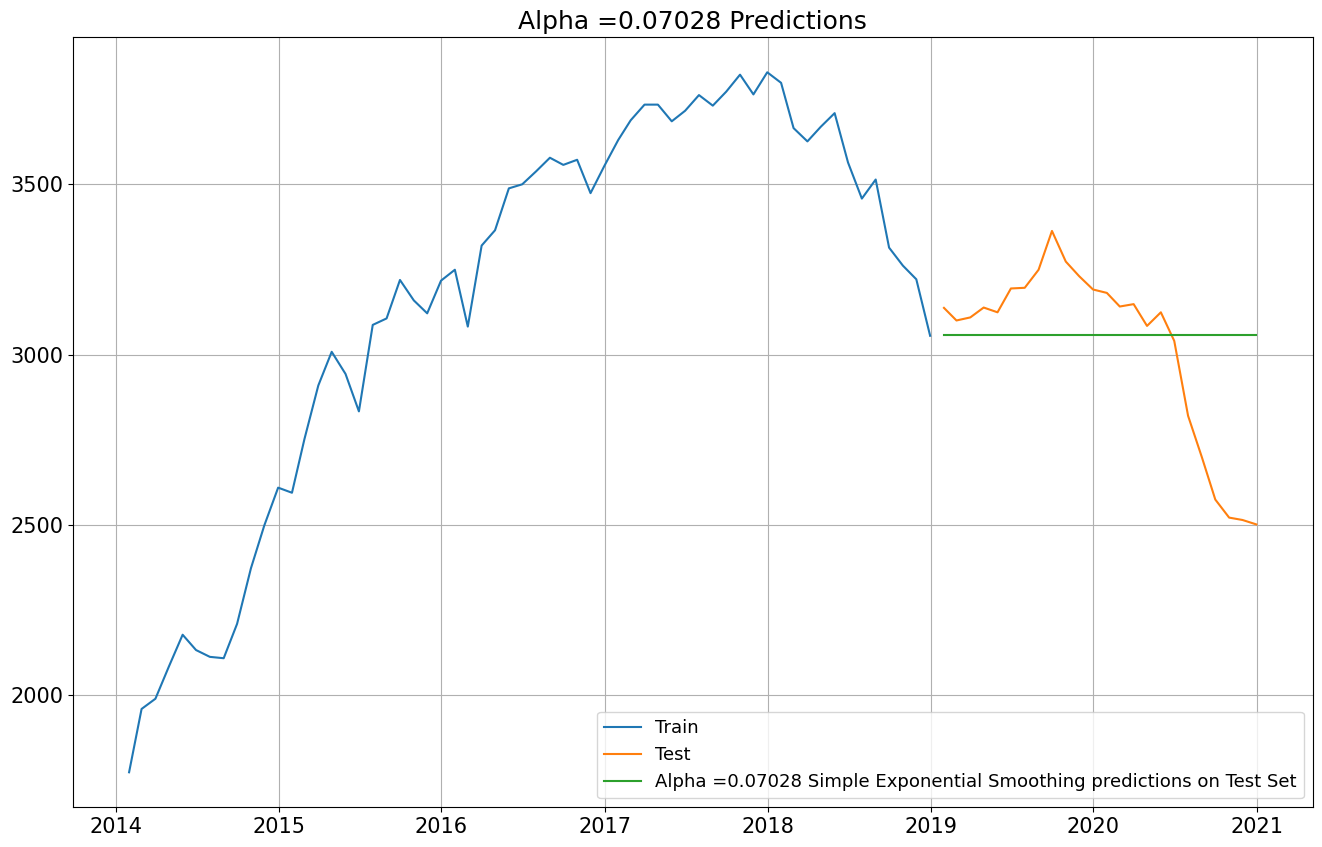

In [155]:
plt.figure(figsize=(16,10))
plt.plot(SES_train['Total Number of Patient Waiting'], label='Train')
plt.plot(SES_test['Total Number of Patient Waiting'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.07028 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best',fontsize=13)
plt.grid()
plt.title('Alpha =0.07028 Predictions');

In [156]:
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Total Number of Patient Waiting'],SES_test['predict'],squared=False)
print("For Alpha =0.07028 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.07028 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 260.715


In [157]:
resultsDf_5 = pd.DataFrame({'Model':['Alpha =0.07028,SimpleExponentialSmoothing'] ,
                            'Test RMSE': [rmse_model5_test_1]})

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Model   Test RMSE
0                          Linear Regression  911.129916
0                                Naive Model  260.464169
0                    Simple Average Forecast  293.926030
0               2 pointTrailingMovingAverage   37.856362
1               4 pointTrailingMovingAverage   89.946309
2               7 pointTrailingMovingAverage  157.833981
3              10 pointTrailingMovingAverage  210.405053
0  Alpha =0.07028,SimpleExponentialSmoothing  260.715198

In [158]:
resultsDf_11 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_11

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [159]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test)+1)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Total Number of Patient Waiting'],SES_train['predict',i],squared=False)
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Total Number of Patient Waiting'],SES_test['predict',i],squared=False)
    resultsDf_11 = resultsDf_11.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/518615820.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_11 = resultsDf_11.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/518615820.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_11 = resultsDf_11.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/518615820.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_11 = resultsDf_11.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/518615820.py:8: FutureWarning: Th

In [160]:
resultsDf_11

Alpha Values  Train RMSE   Test RMSE
0           0.1  376.849018  514.046667
1           0.2  228.303824  423.520057
2           0.3  171.400753  356.061202
3           0.4  142.129405  317.409976
4           0.5  124.915484  294.834894
5           0.6  114.041085  281.084658
6           0.7  106.934271  272.351005
7           0.8  102.292225  266.623905
8           0.9   99.407883  262.842678

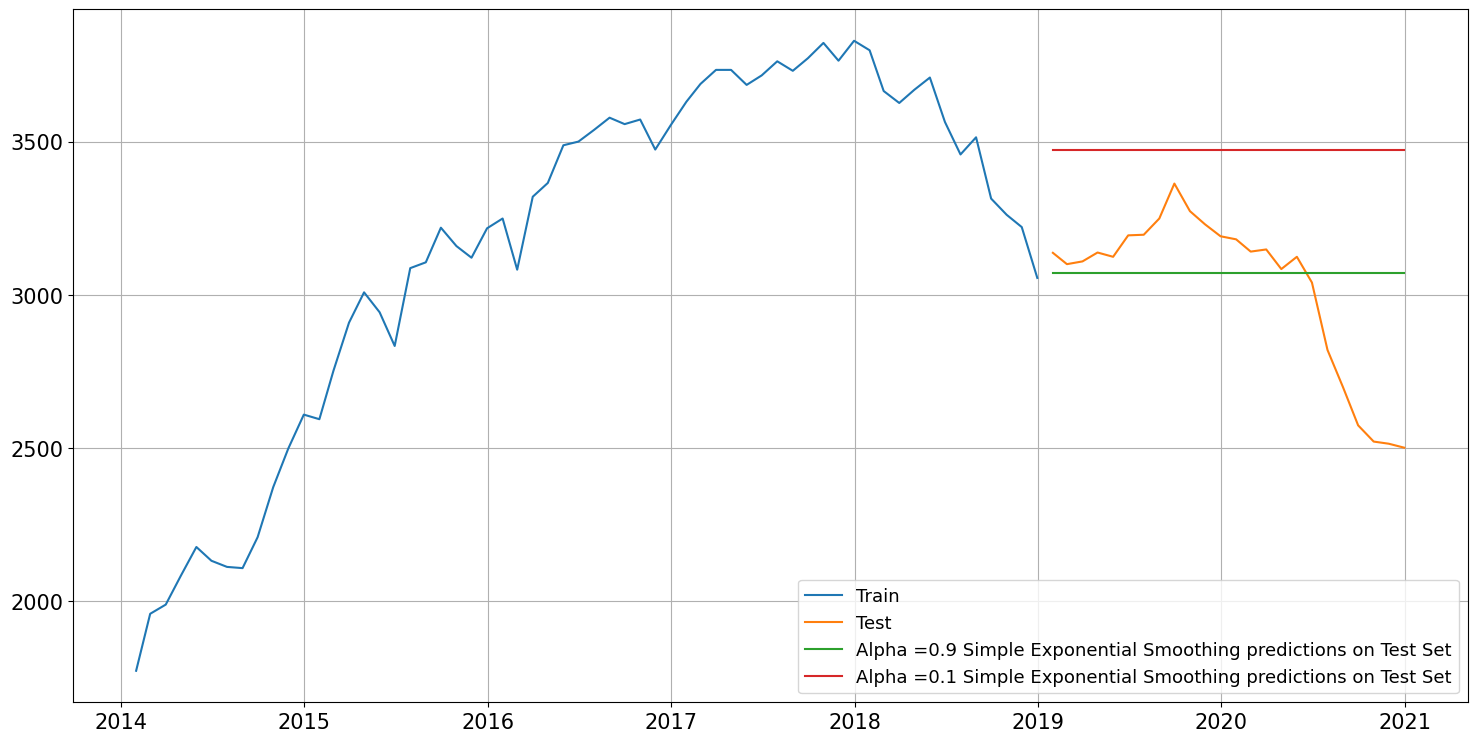

In [168]:
plt.figure(figsize=(18,9))
plt.plot(SES_train['Total Number of Patient Waiting'], label='Train')
plt.plot(SES_test['Total Number of Patient Waiting'], label='Test')

plt.plot(SES_test['predict', 0.9], label='Alpha =0.9 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best',fontsize=13)
plt.grid();

In [169]:
resultsDf_11.sort_values(by=['Test RMSE'],ascending=True).values[0][2]

262.84267837857277

In [170]:
resultsDf_6_1 = pd.DataFrame({'Model':['Alpha =0.3 Simple Exponential Smoothing'] ,
                            'Test RMSE': [resultsDf_11.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]})

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Model   Test RMSE
0                          Linear Regression  911.129916
0                                Naive Model  260.464169
0                    Simple Average Forecast  293.926030
0               2 pointTrailingMovingAverage   37.856362
1               4 pointTrailingMovingAverage   89.946309
2               7 pointTrailingMovingAverage  157.833981
3              10 pointTrailingMovingAverage  210.405053
0  Alpha =0.07028,SimpleExponentialSmoothing  260.715198
0    Alpha =0.3 Simple Exponential Smoothing  262.842678

Method 6: Double Exponential Smoothing (Holt's Model)

In [171]:
DES_train = train.copy()
DES_test = test.copy()

In [173]:
model_DES = Holt(DES_train['Total Number of Patient Waiting'],initialization_method='estimated')

/Users/muffin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [174]:
model_DES_autofit = model_DES.fit(optimized=True)

In [175]:
model_DES_autofit.params

{'smoothing_level': 0.8080976165264253,
 'smoothing_trend': 0.14774772998398064,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1727.7217103616347,
 'initial_trend': 69.84796780254372,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [176]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test)+1)
DES_test.head()

Total Number of Patient Waiting      predict
Time_Stamp                                              
2019-01-31                             3137  3016.104229
2019-02-28                             3100  2954.441694
2019-03-31                             3109  2892.779159
2019-04-30                             3138  2831.116624
2019-05-31                             3124  2769.454088

In [178]:
rmse_model5DES_test_1 = metrics.mean_squared_error(DES_test['Total Number of Patient Waiting'],DES_test['predict'],squared=False)
print("For Alpha =0.663 Beta= 9.96e-05 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5DES_test_1))

For Alpha =0.663 Beta= 9.96e-05 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 775.702


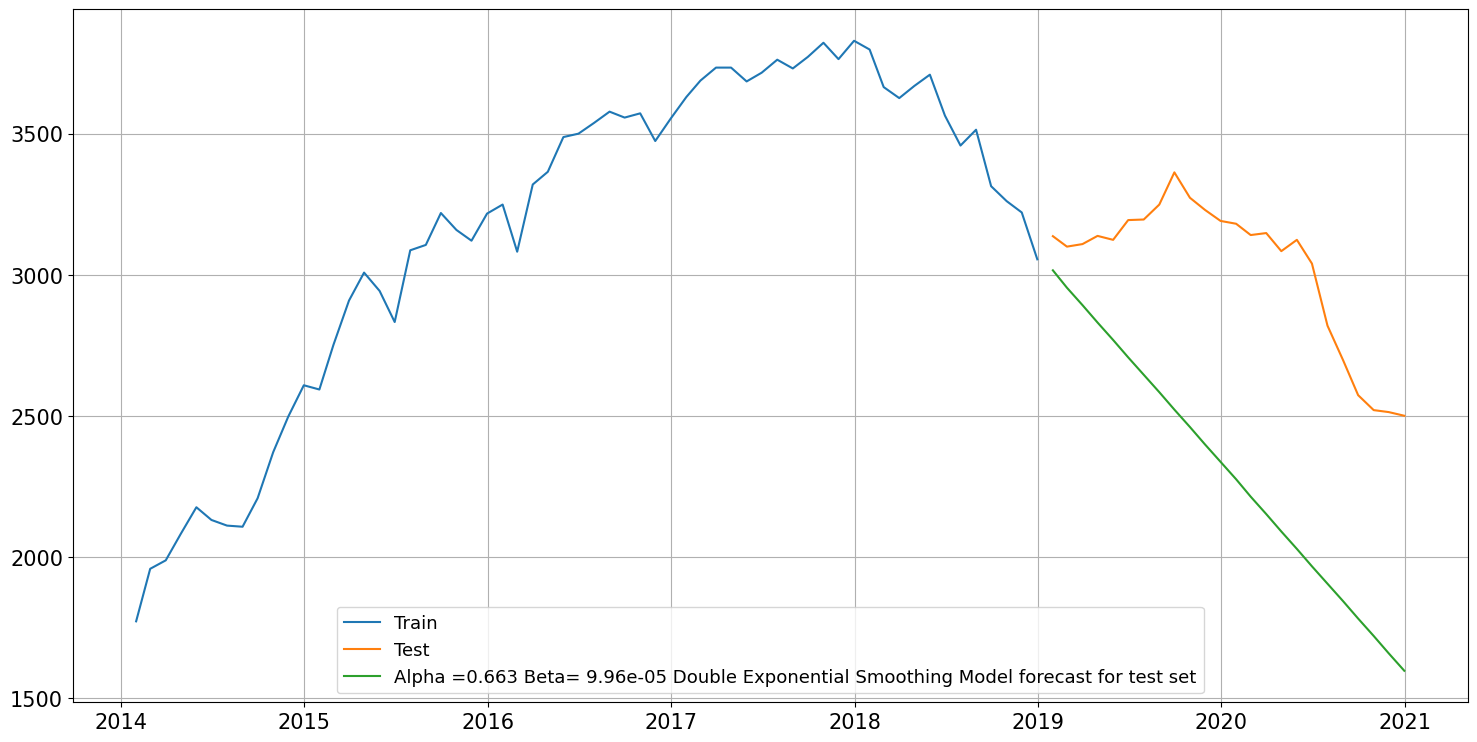

In [179]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Total Number of Patient Waiting'], label='Train')
plt.plot(DES_test['Total Number of Patient Waiting'], label='Test')

plt.plot(DES_test['predict'], label='Alpha =0.663 Beta= 9.96e-05 Double Exponential Smoothing Model forecast for test set')

plt.legend(loc='best',fontsize=13)
plt.grid();

In [180]:
resultsDf_12 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_12

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [181]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test)+1)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Total Number of Patient Waiting'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Total Number of Patient Waiting'],DES_test['predict',i,j],squared=False)
        
        resultsDf_12 = resultsDf_12.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/3227832219.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_12 = resultsDf_12.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/3227832219.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_12 = resultsDf_12.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/3227832219.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_12 = resultsDf_12.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/

/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/3227832219.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_12 = resultsDf_12.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/3227832219.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_12 = resultsDf_12.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/3227832219.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_12 = resultsDf_12.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/

In [182]:
resultsDf_12

Alpha Values  Beta Values  Train RMSE    Test RMSE
0            0.1          0.1  229.284178   312.013545
1            0.1          0.2  170.082247   312.063960
2            0.1          0.3  155.011457   541.380979
3            0.1          0.4  150.234678   830.987822
4            0.1          0.5  143.225902  1073.780743
..           ...          ...         ...          ...
95           1.0          0.6  108.859652  1642.057058
96           1.0          0.7  113.534348  1777.602728
97           1.0          0.8  118.629905  1926.304462
98           1.0          0.9  124.259303  2089.731127
99           1.0          1.0  130.576047  2265.148321

[100 rows x 4 columns]

In [183]:
resultsDf_12.sort_values(by=['Test RMSE']).head(10)

Alpha Values  Beta Values  Train RMSE   Test RMSE
10           0.2          0.1  146.566930  202.262463
0            0.1          0.1  229.284178  312.013545
1            0.1          0.2  170.082247  312.063960
20           0.3          0.1  118.972444  321.128407
30           0.4          0.1  105.624008  399.396948
40           0.5          0.1   98.374635  449.983872
50           0.6          0.1   94.267259  485.995388
60           0.7          0.1   92.027768  514.508330
70           0.8          0.1   91.059060  539.609551
2            0.1          0.3  155.011457  541.380979

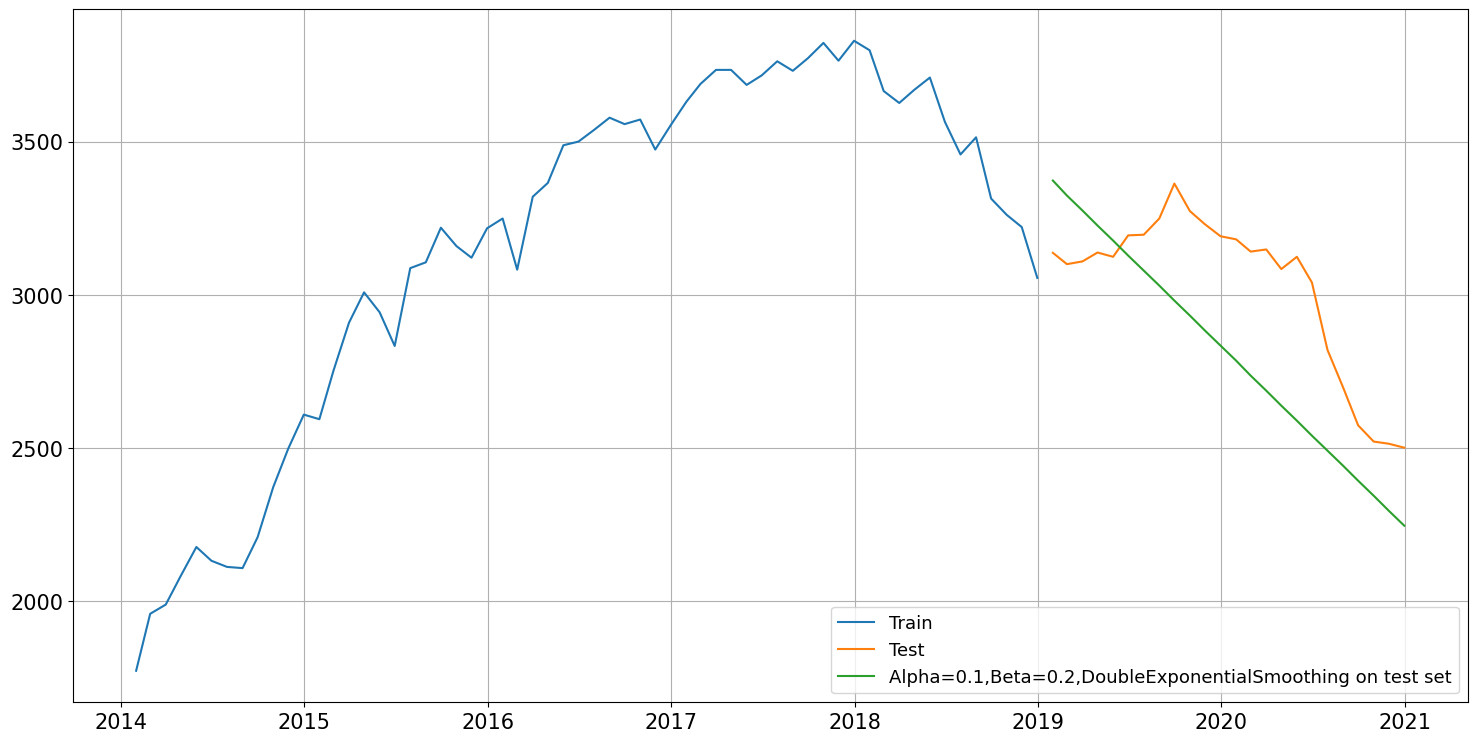

In [195]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Total Number of Patient Waiting'], label='Train')
plt.plot(DES_test['Total Number of Patient Waiting'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.2], label='Alpha=0.1,Beta=0.2,DoubleExponentialSmoothing on test set')

plt.legend(loc='best',fontsize=13)
plt.grid();

In [186]:
resultsDf_12.sort_values(by=['Test RMSE'],ascending=True).values[0][3]

202.26246270704186

In [196]:
resultsDf_7_1 = pd.DataFrame({'Model':['Alpha=0.1,Beta=0.2,DoubleExponentialSmoothing'] ,
                            'Test RMSE': [resultsDf_12.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]})
resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Model   Test RMSE
0                              Linear Regression  911.129916
0                                    Naive Model  260.464169
0                        Simple Average Forecast  293.926030
0                   2 pointTrailingMovingAverage   37.856362
1                   4 pointTrailingMovingAverage   89.946309
2                   7 pointTrailingMovingAverage  157.833981
3                  10 pointTrailingMovingAverage  210.405053
0      Alpha =0.07028,SimpleExponentialSmoothing  260.715198
0        Alpha =0.3 Simple Exponential Smoothing  262.842678
0  Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  202.262463
0  Alpha=0.1,Beta=0.2,DoubleExponentialSmoothing  202.262463

Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [188]:
TES_train = train.copy()
TES_test = test.copy()

In [190]:
model_TES = ExponentialSmoothing(TES_train['Total Number of Patient Waiting'],trend='additive',seasonal='multiplicative',freq='M')

In [191]:
model_TES_autofit = model_TES.fit()

In [192]:
model_TES_autofit.params

{'smoothing_level': 0.7474999775651006,
 'smoothing_trend': 0.14950000760886425,
 'smoothing_seasonal': 0.00010001025741907557,
 'damping_trend': nan,
 'initial_level': 2123.8610391268567,
 'initial_trend': 72.70096799671954,
 'initial_seasons': array([0.99973094, 0.99003159, 1.00991075, 1.0197628 , 1.0216601 ,
        1.00176247, 1.00989079, 1.01162272, 1.00754257, 1.00932671,
        0.99684054, 1.00586869]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [193]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test)+1)
TES_test.head()

Total Number of Patient Waiting  auto_predict
Time_Stamp                                               
2019-01-31                             3137   3012.507457
2019-02-28                             3100   2924.376193
2019-03-31                             3109   2922.936664
2019-04-30                             3138   2890.714841
2019-05-31                             3124   2835.241444

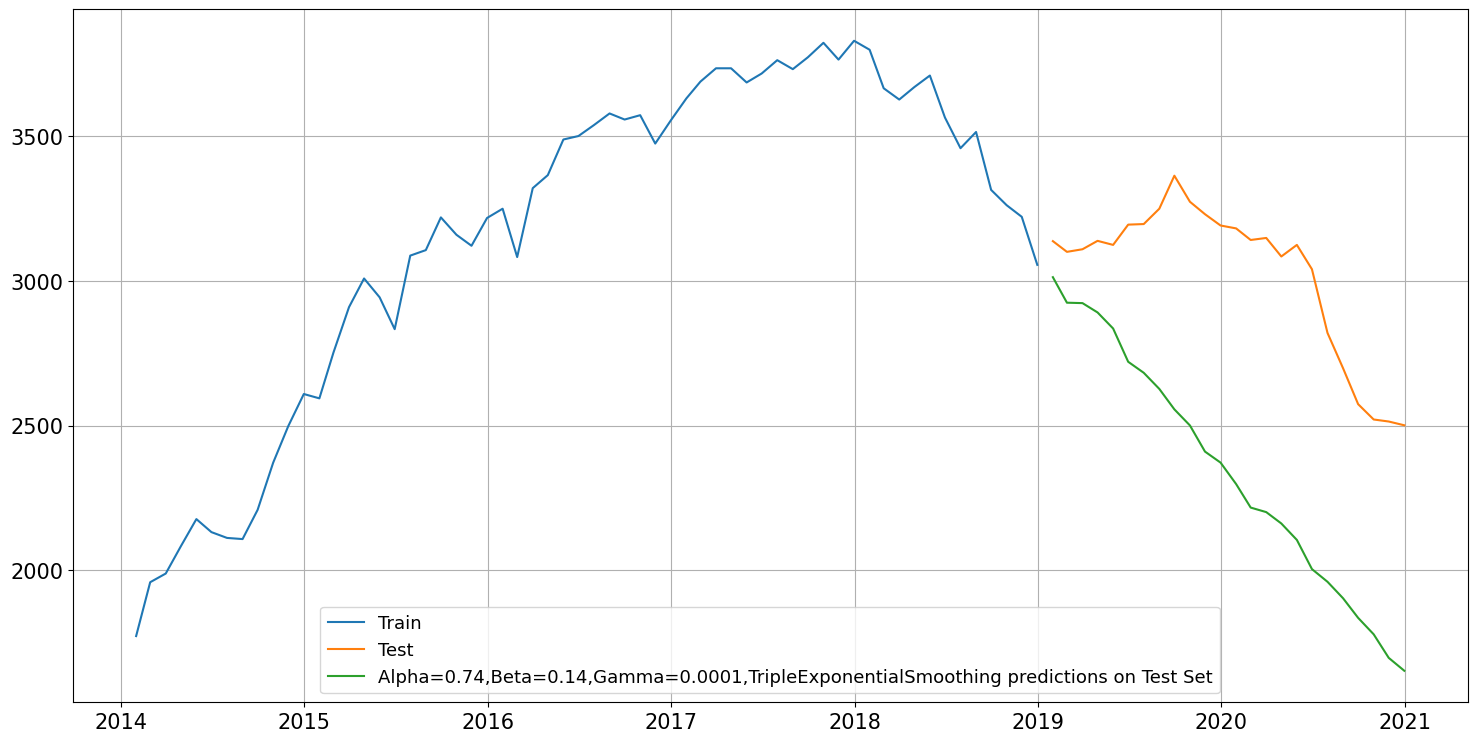

In [197]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Total Number of Patient Waiting'], label='Train')
plt.plot(TES_test['Total Number of Patient Waiting'], label='Test')
plt.plot(TES_test['auto_predict'], label='Alpha=0.74,Beta=0.14,Gamma=0.0001,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best',fontsize=13)
plt.grid();

In [199]:
rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Total Number of Patient Waiting'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.11,Beta=0.74,Gamma=0.0001, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.11,Beta=0.74,Gamma=0.0001, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 736.944


In [200]:
resultsDf_8_1 = pd.DataFrame({'Model':['For Alpha=0.11,Beta=0.74,Gamma=0.0001, Triple Exponential Smoothing Model'] ,
                            'Test RMSE': [rmse_model6_test_1]})
resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Model   Test RMSE
0                                  Linear Regression  911.129916
0                                        Naive Model  260.464169
0                            Simple Average Forecast  293.926030
0                       2 pointTrailingMovingAverage   37.856362
1                       4 pointTrailingMovingAverage   89.946309
2                       7 pointTrailingMovingAverage  157.833981
3                      10 pointTrailingMovingAverage  210.405053
0          Alpha =0.07028,SimpleExponentialSmoothing  260.715198
0            Alpha =0.3 Simple Exponential Smoothing  262.842678
0      Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  202.262463
0      Alpha=0.1,Beta=0.2,DoubleExponentialSmoothing  202.262463
0  For Alpha=0.11,Beta=0.74,Gamma=0.0001, Triple ...  736.944001

In [201]:
resultsDf_13 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_13

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [202]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test)+1)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Total Number of Patient Waiting'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Total Number of Patient Waiting'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_13 = resultsDf_13.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/278211746.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_13 = resultsDf_13.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/278211746.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_13 = resultsDf_13.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/278211746.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_13 = resultsDf_13.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/278211746.py:12: FutureWarn

/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/278211746.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_13 = resultsDf_13.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/278211746.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_13 = resultsDf_13.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/278211746.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_13 = resultsDf_13.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/278211746.py:12: FutureWarn

/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/278211746.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/278211746.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test)+1)
/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/278211746.py:12: FutureWarning: The frame.append method is deprecated and wi

/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/278211746.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test)+1)
/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/278211746.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_13 = resultsDf_13.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/278211746.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at o

/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/278211746.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/278211746.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test)+1)
/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/278211746.py:12: FutureWarning: The frame.append method is deprecated and wi

In [203]:
resultsDf_13

Alpha Values  Beta Values  Gamma Values    Train RMSE     Test RMSE
0             0.1          0.1           0.1    234.490341    321.187127
1             0.1          0.1           0.2    235.911940    312.705026
2             0.1          0.1           0.3    237.419549    307.110307
3             0.1          0.1           0.4    239.497154    302.818447
4             0.1          0.1           0.5    242.605445    298.715362
..            ...          ...           ...           ...           ...
995           1.0          1.0           0.6   1704.564709  51622.372138
996           1.0          1.0           0.7   8918.197606  13552.472593
997           1.0          1.0           0.8   7609.230575  43596.518534
998           1.0          1.0           0.9   6941.300546  32261.917817
999           1.0          1.0           1.0  13861.549735  29407.904267

[1000 rows x 5 columns]

In [204]:
resultsDf_13.sort_values(by=['Test RMSE']).head(10)

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
100           0.2          0.1           0.1  164.438347  204.898678
101           0.2          0.1           0.2  168.361076  209.208508
384           0.4          0.9           0.5  172.228167  210.744412
102           0.2          0.1           0.3  172.309021  211.356014
103           0.2          0.1           0.4  176.681284  213.227301
104           0.2          0.1           0.5  182.015189  216.646088
465           0.5          0.7           0.6  192.329886  218.190680
105           0.2          0.1           0.6  188.845933  223.469145
228           0.3          0.3           0.9  230.447232  226.640372
475           0.5          0.8           0.6  221.560287  235.530429

In [205]:
resultsDf_13.sort_values(by=['Test RMSE'],ascending=True).values[0][4]

204.89867803068083

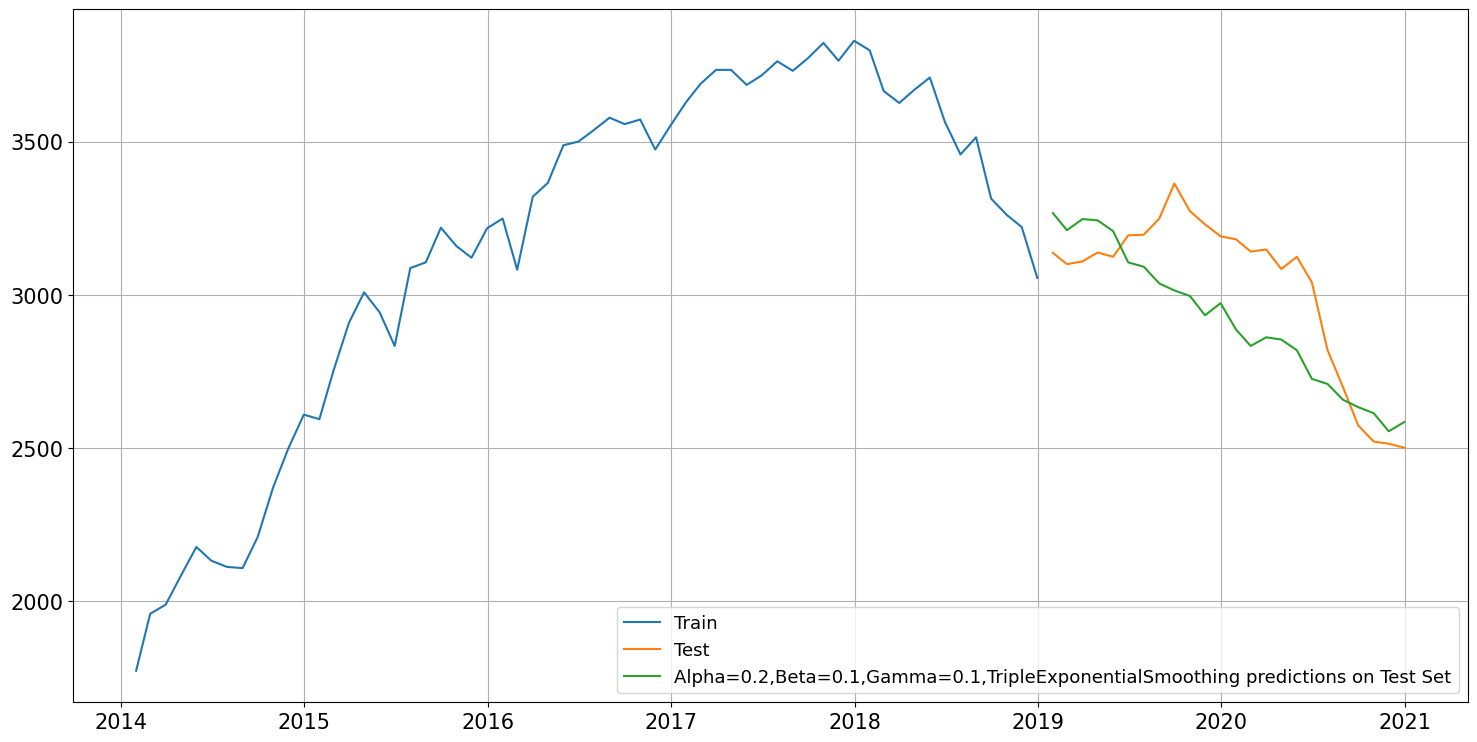

In [206]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Total Number of Patient Waiting'], label='Train')
plt.plot(TES_test['Total Number of Patient Waiting'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.2, 0.1, 0.1], label='Alpha=0.2,Beta=0.1,Gamma=0.1,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best',fontsize=13)
plt.grid();

In [207]:
resultsDf_9_1 = pd.DataFrame({'Model':['Alpha=0.2,Beta=0.1,Gamma=0.1,Triple Exponential Smoothing'] ,
                            'Test RMSE': [resultsDf_13.sort_values(by=['Test RMSE'],ascending=True).values[0][4]]})


resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

Model   Test RMSE
0                                  Linear Regression  911.129916
0                                        Naive Model  260.464169
0                            Simple Average Forecast  293.926030
0                       2 pointTrailingMovingAverage   37.856362
1                       4 pointTrailingMovingAverage   89.946309
2                       7 pointTrailingMovingAverage  157.833981
3                      10 pointTrailingMovingAverage  210.405053
0          Alpha =0.07028,SimpleExponentialSmoothing  260.715198
0            Alpha =0.3 Simple Exponential Smoothing  262.842678
0      Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  202.262463
0      Alpha=0.1,Beta=0.2,DoubleExponentialSmoothing  202.262463
0  For Alpha=0.11,Beta=0.74,Gamma=0.0001, Triple ...  736.944001
0  Alpha=0.2,Beta=0.1,Gamma=0.1,Triple Exponentia...  204.898678

Check for stationarity of the whole Time Series data

In [208]:
from statsmodels.tsa.stattools import adfuller

In [209]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best',fontsize=13)
    plt.title('Rolling Mean & Standard Deviation')
    plt.grid()
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

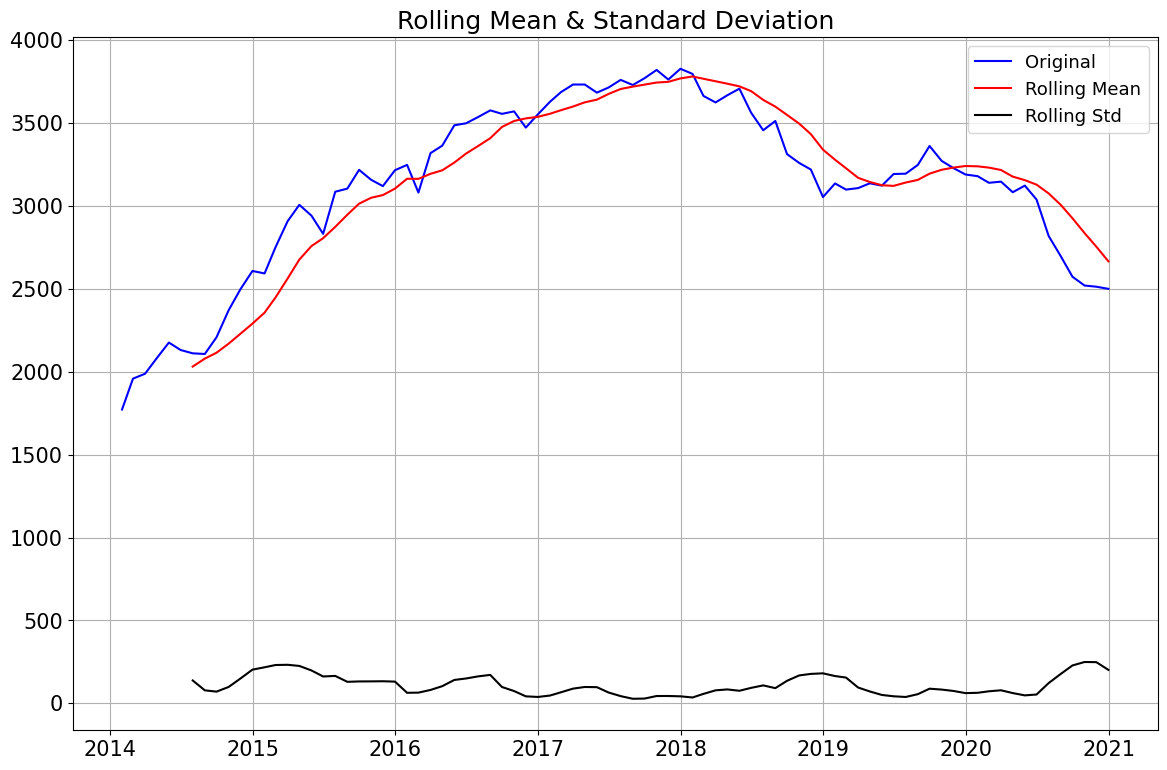

Results of Dickey-Fuller Test:
Test Statistic                 -1.816735
p-value                         0.372185
#Lags Used                      5.000000
Number of Observations Used    78.000000
Critical Value (1%)            -3.517114
Critical Value (5%)            -2.899375
Critical Value (10%)           -2.586955
dtype: float64 



In [210]:
test_stationarity(df['Total Number of Patient Waiting'])

In [211]:
dftest1 = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest1[0])
print('DF test p-value is' ,dftest1[1])
print('Number of lags used' ,dftest1[2])

DF test statistic is -9.474
DF test p-value is 3.169254035346899e-14
Number of lags used 0


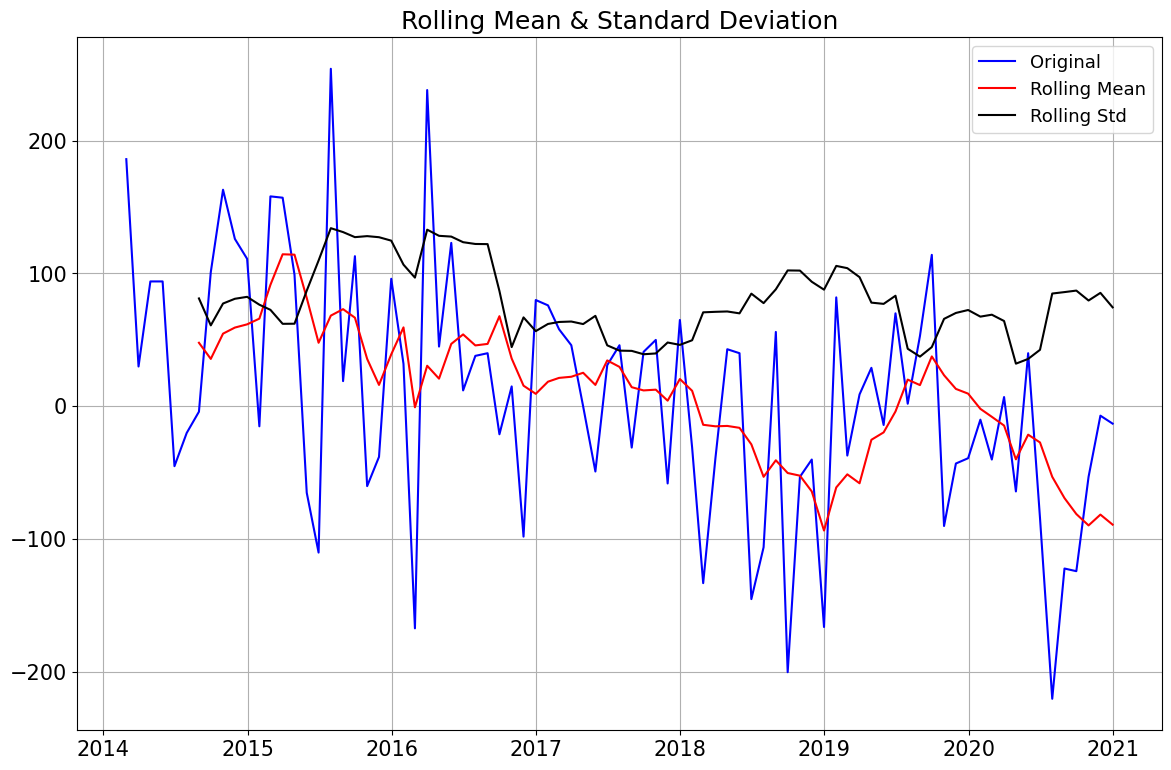

Results of Dickey-Fuller Test:
Test Statistic                -7.877587e+00
p-value                        4.797763e-12
#Lags Used                     0.000000e+00
Number of Observations Used    8.200000e+01
Critical Value (1%)           -3.512738e+00
Critical Value (5%)           -2.897490e+00
Critical Value (10%)          -2.585949e+00
dtype: float64 



In [212]:
test_stationarity(df['Total Number of Patient Waiting'].diff().dropna())

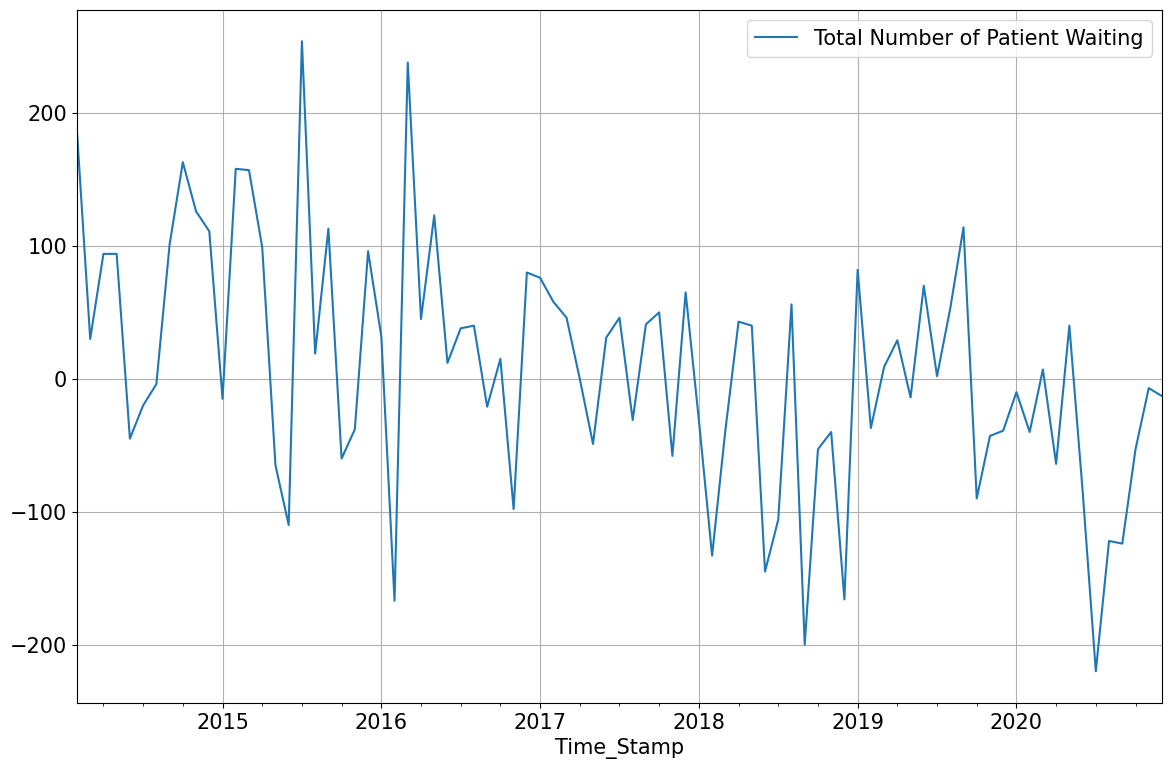

In [213]:
df.diff().dropna().plot(grid=True);

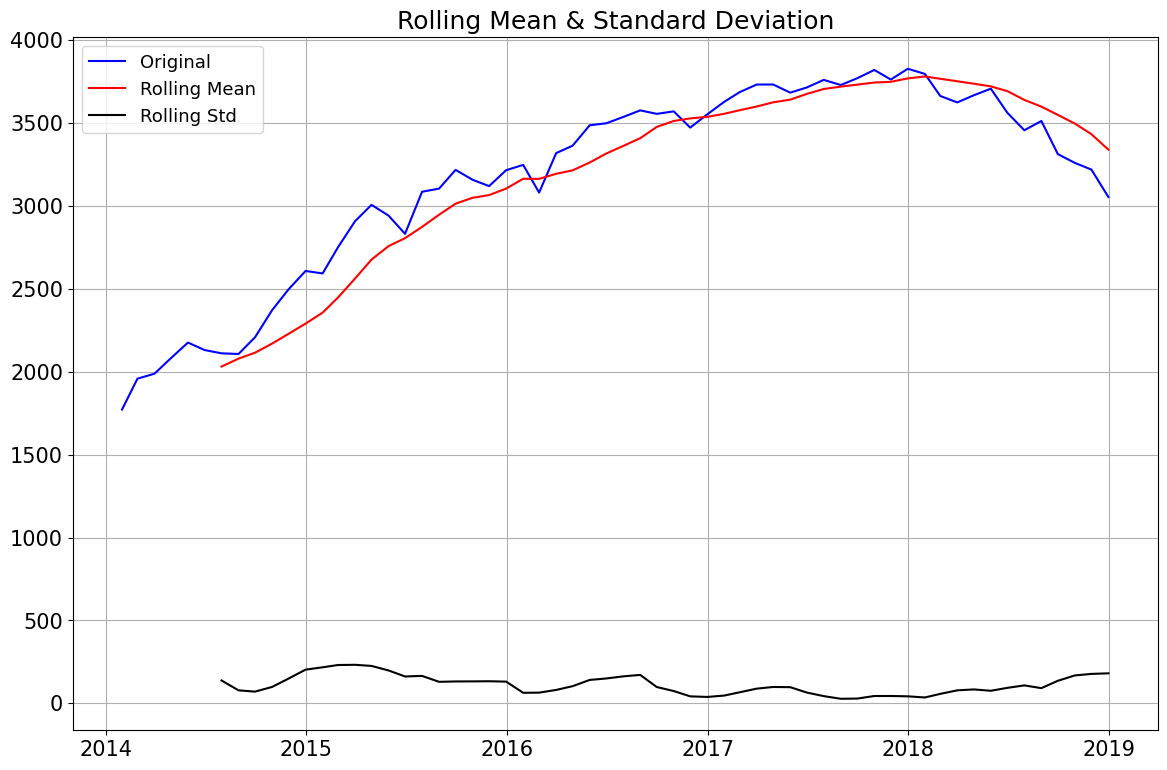

Results of Dickey-Fuller Test:
Test Statistic                 -3.077653
p-value                         0.028252
#Lags Used                      0.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64 



In [214]:
test_stationarity(train['Total Number of Patient Waiting'])

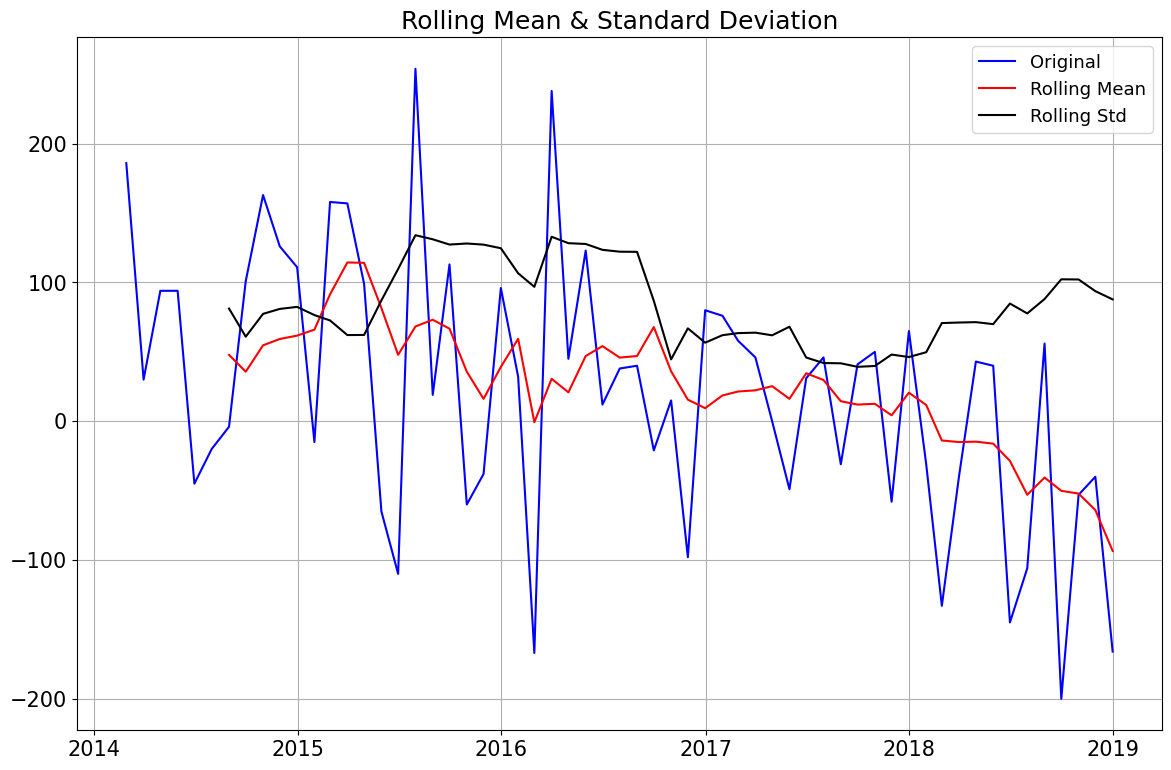

Results of Dickey-Fuller Test:
Test Statistic                 -1.257834
p-value                         0.648236
#Lags Used                      4.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64 



In [215]:
test_stationarity(train['Total Number of Patient Waiting'].diff().dropna())

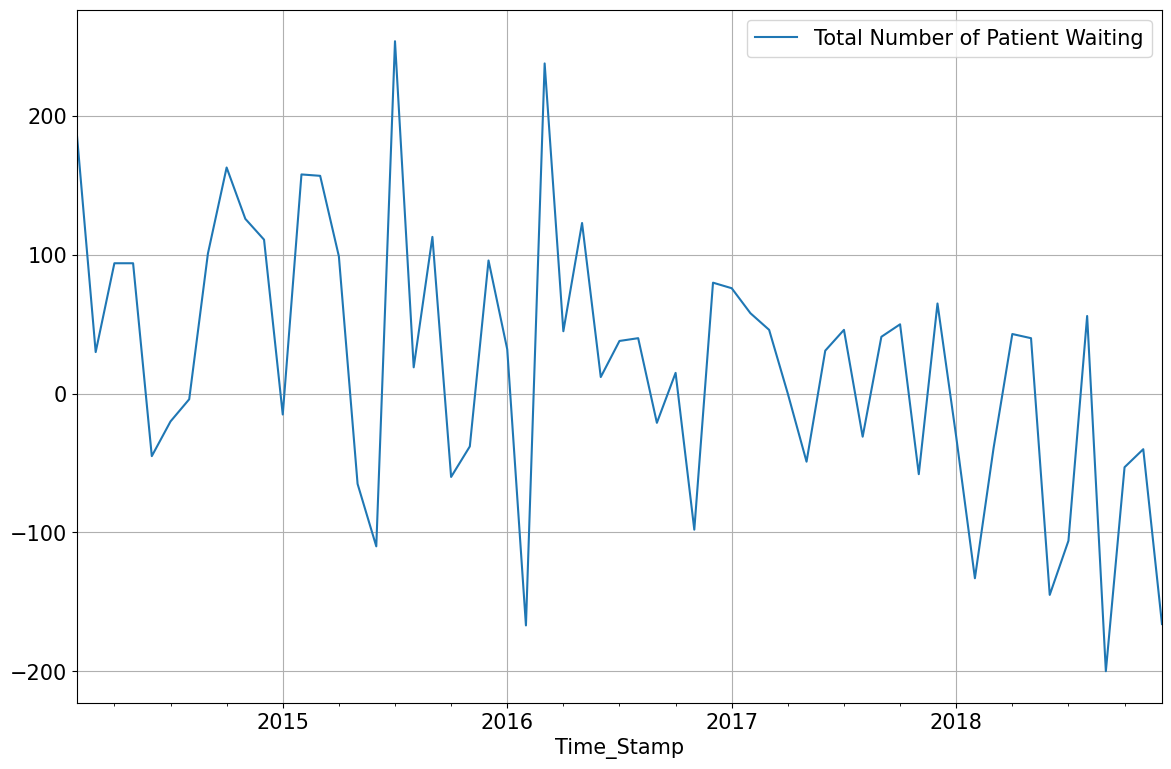

In [216]:
train.diff().dropna().plot(grid=True);

In [217]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))

In [218]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [219]:
arima_train = train.copy()
arima_test = test.copy()

In [220]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(arima_train['Total Number of Patient Waiting'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:710.9612807225341
ARIMA(0, 1, 1) - AIC:712.2086094488831
ARIMA(0, 1, 2) - AIC:713.7753106672287
ARIMA(0, 1, 3) - AIC:714.3785162637805
ARIMA(1, 1, 0) - AIC:712.0434469246654
ARIMA(1, 1, 1) - AIC:706.9438164962665
ARIMA(1, 1, 2) - AIC:707.8365109204549
ARIMA(1, 1, 3) - AIC:708.4152811379499
ARIMA(2, 1, 0) - AIC:713.2240578231238
ARIMA(2, 1, 1) - AIC:708.184123170855


/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/2555322888.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/2555322888.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/2555322888.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/2555322888.py:6: Futu

ARIMA(2, 1, 2) - AIC:710.443490345603
ARIMA(2, 1, 3) - AIC:707.9912470364501
ARIMA(3, 1, 0) - AIC:712.925774696609
ARIMA(3, 1, 1) - AIC:709.0341887157658


/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/2555322888.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
/Users/muffin/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/2555322888.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/2555322888.py:6: FutureWarning: The frame.append method is deprecated and will be removed f

ARIMA(3, 1, 2) - AIC:708.1524638523621
ARIMA(3, 1, 3) - AIC:709.5439608676951


/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/2555322888.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
/Users/muffin/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/z_/wysvdfnd3fq1yvqbm4pyrrrm0000gn/T/ipykernel_8953/2555322888.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


In [221]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param         AIC
5   (1, 1, 1)  706.943816
6   (1, 1, 2)  707.836511
11  (2, 1, 3)  707.991247
14  (3, 1, 2)  708.152464
9   (2, 1, 1)  708.184123
7   (1, 1, 3)  708.415281
13  (3, 1, 1)  709.034189
15  (3, 1, 3)  709.543961
10  (2, 1, 2)  710.443490
0   (0, 1, 0)  710.961281
4   (1, 1, 0)  712.043447
1   (0, 1, 1)  712.208609
12  (3, 1, 0)  712.925775
8   (2, 1, 0)  713.224058
2   (0, 1, 2)  713.775311
3   (0, 1, 3)  714.378516

In [223]:
auto_ARIMA = ARIMA(arima_train['Total Number of Patient Waiting'], order=(1,1,1),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                                      SARIMAX Results                                      
Dep. Variable:     Total Number of Patient Waiting   No. Observations:                   60
Model:                              ARIMA(1, 1, 1)   Log Likelihood                -350.472
Date:                             Wed, 24 Apr 2024   AIC                            706.944
Time:                                     19:33:14   BIC                            713.176
Sample:                                 01-31-2014   HQIC                           709.377
                                      - 12-31-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9769      0.032     30.662      0.000       0.914       1.039
ma.L1         -0.8731      

/Users/muffin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/muffin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/muffin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [224]:
arima_test['predict'] = results_auto_ARIMA.forecast(steps=len(test)+1)

In [225]:
rmse_arima = metrics.mean_squared_error(arima_test['Total Number of Patient Waiting'],arima_test['predict'] ,squared=False)

In [226]:
print(rmse_arima)

503.1105815777344


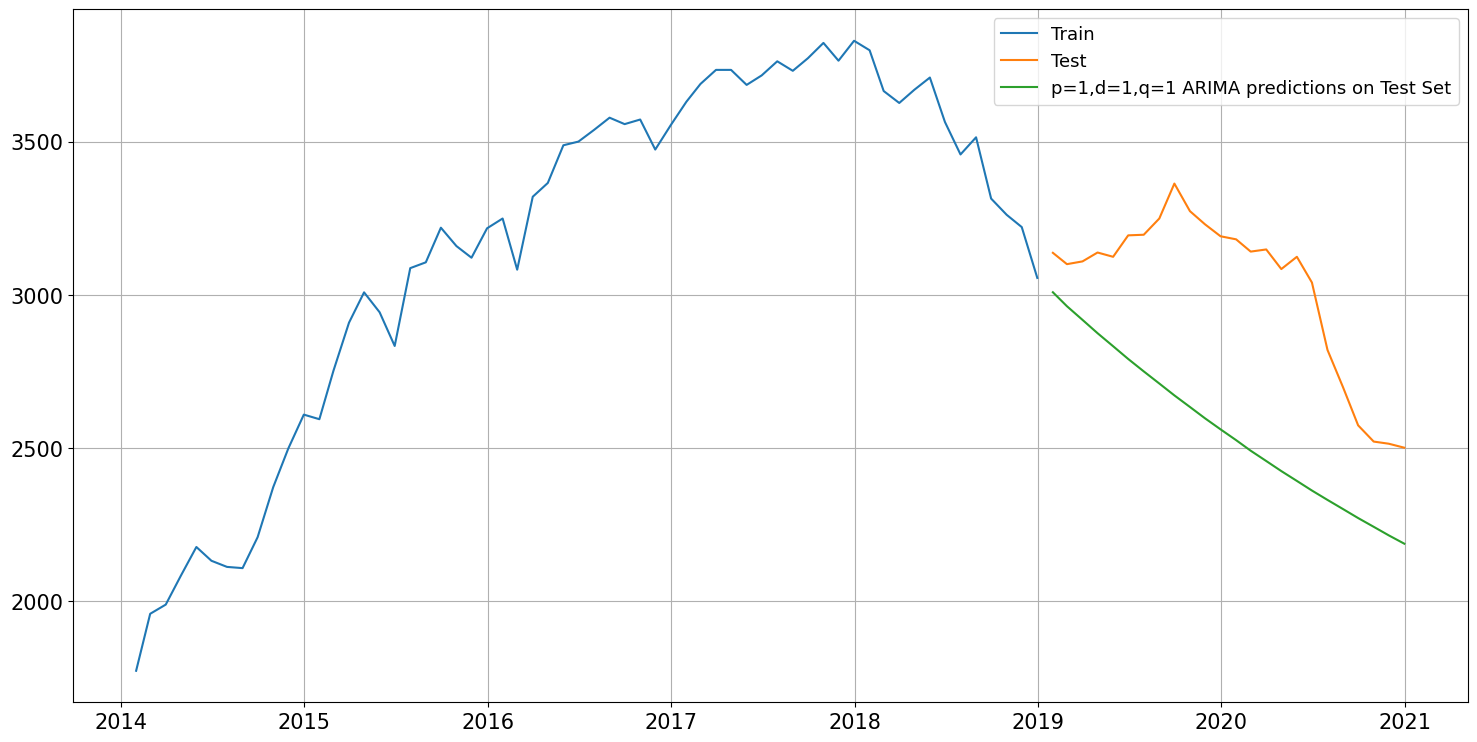

In [227]:
plt.figure(figsize=(18,9))
plt.plot(arima_train['Total Number of Patient Waiting'], label='Train')
plt.plot(arima_test['Total Number of Patient Waiting'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(arima_test['predict'], label='p=1,d=1,q=1 ARIMA predictions on Test Set')


plt.legend(loc='best',fontsize=13)
plt.grid();

In [228]:
resultsDf_99_1 = pd.DataFrame({'Model':['Arima [1,1,1]'] ,
                            'Test RMSE': [rmse_arima]})


resultsDf = pd.concat([resultsDf, resultsDf_99_1])
resultsDf

Model   Test RMSE
0                                  Linear Regression  911.129916
0                                        Naive Model  260.464169
0                            Simple Average Forecast  293.926030
0                       2 pointTrailingMovingAverage   37.856362
1                       4 pointTrailingMovingAverage   89.946309
2                       7 pointTrailingMovingAverage  157.833981
3                      10 pointTrailingMovingAverage  210.405053
0          Alpha =0.07028,SimpleExponentialSmoothing  260.715198
0            Alpha =0.3 Simple Exponential Smoothing  262.842678
0      Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  202.262463
0      Alpha=0.1,Beta=0.2,DoubleExponentialSmoothing  202.262463
0  For Alpha=0.11,Beta=0.74,Gamma=0.0001, Triple ...  736.944001
0  Alpha=0.2,Beta=0.1,Gamma=0.1,Triple Exponentia...  204.898678
0                                      Arima [1,1,1]  503.110582